## Imports and Function declarations

In [38]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
)
from sklearn.svm import (
    SVC,
    SVR,
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)

from sklearn.metrics import (
    roc_curve,
    auc,
    classification_report,
    mean_squared_error,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)

In [39]:
def plotROC(clf, XTest, QTest, probs=True):
    if (probs == True):
        probs = clf.predict_proba(XTest)
        preds = probs[:,1]
    else:
        preds = clf.decision_function(XTest)
    
    fpr, tpr, threshold = roc_curve(QTest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [40]:
def discreteAlcohol(df):
    df["alcohol_cat"] = 'L'
    mean = df["alcohol"].mean()
    stddev = df["alcohol"].std()
    for index, series in df.iterrows():
        alcohol = series["alcohol"]
        if alcohol < (mean-stddev):
            df.loc[index, "alcohol_cat"] = 'L'
        elif alcohol > (mean+stddev):
            df.loc[index, "alcohol_cat"] = 'H'
        else:
            df.loc[index, "alcohol_cat"] = 'M'

In [41]:
def discreteSugar(df):
    df["isSweet"] = 0
    threshold = df["residual sugar"].median()

    for index, series in df.iterrows():
        sugar = series["residual sugar"]
        if sugar < threshold:
            df.loc[index, "isSweet"] = 0
        else:
            df.loc[index, "isSweet"] = 1

In [42]:
path = 'https://raw.githubusercontent.com/Jonezy11/CSC2034/master/data/'
data_w = pd.read_csv(path + "winequality-white.csv", header=0, sep=';')
data_r = pd.read_csv(path + "winequality-red.csv", header=0, sep=';')

## Initial Exploration of Datasets

### Quality Distribution

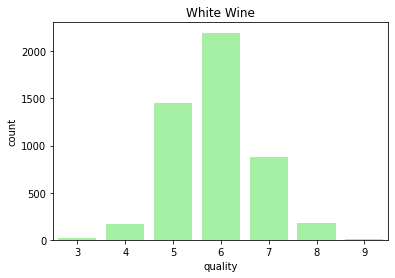

In [43]:
g = sns.countplot(data=data_w, x="quality", color='palegreen').set(title = "White Wine")

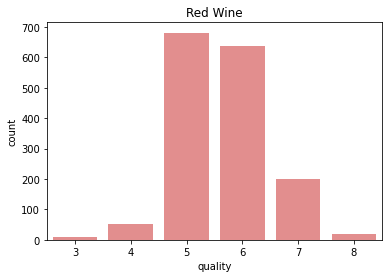

In [44]:
g = sns.countplot(data=data_r, x="quality", color='lightcoral').set(title = "Red Wine")

Similiar quality distrubutions between red and white, with red having a lower average quality

### Discretising Alcohol Content

In [45]:
discreteAlcohol(data_w)
discreteAlcohol(data_r)

### Quality Distribution against Alcohol Content

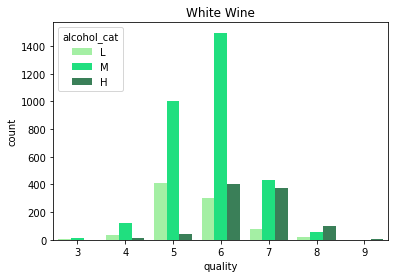

In [46]:
g = sns.countplot(data=data_w, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"palegreen",'M':"springgreen",'H':"seagreen"}).set(title = "White Wine")

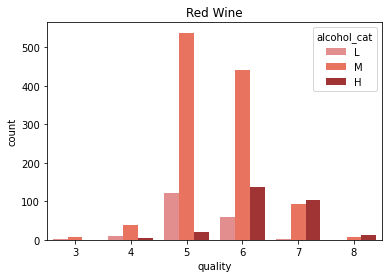

In [47]:
g = sns.countplot(data=data_r, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"lightcoral",'M':"tomato",'H':"firebrick"}).set(title = "Red Wine")

Higher alcohol content seems to correspond with higher quality

### Residual Sugar Analysis

#### White Wine

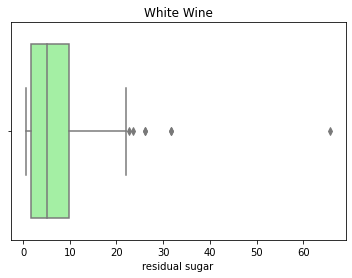

In [48]:
g = sns.boxplot(data=data_w, x='residual sugar', color='palegreen').set(title = "White Wine")

Discretising sugar content

In [49]:
discreteSugar(data_w)

Dataset is evenly split

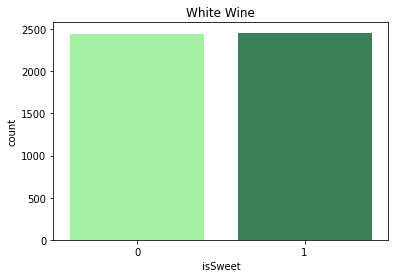

In [50]:
g = sns.countplot(data=data_w, x="isSweet", palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

In [51]:
data_w["isSweet"].value_counts()

1    2458
0    2440
Name: isSweet, dtype: int64

#### Red Wine

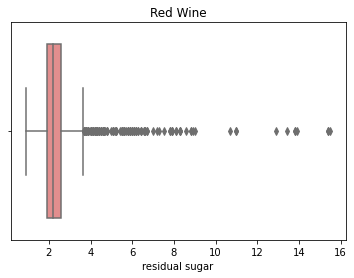

In [52]:
g = sns.boxplot(data=data_r, x='residual sugar', color='lightcoral').set(title = "Red Wine")

Discretising sugar content

In [53]:
discreteSugar(data_r)

Dataset is evenly split

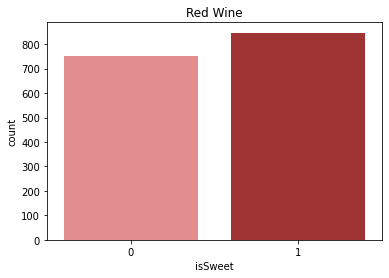

In [54]:
g = sns.countplot(data=data_r, x="isSweet", palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

In [55]:
data_r["isSweet"].value_counts()

1    847
0    752
Name: isSweet, dtype: int64

#### White wine is generally sweeter than red wine

### Quality Distribution against Residual Sugar

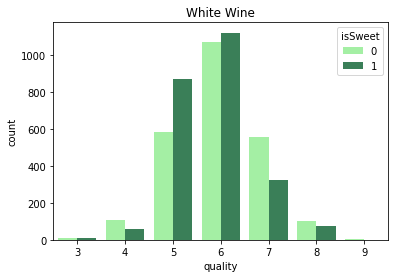

In [56]:
g = sns.countplot(data=data_w, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

Dryer white wines are more prevalent at higher qualities

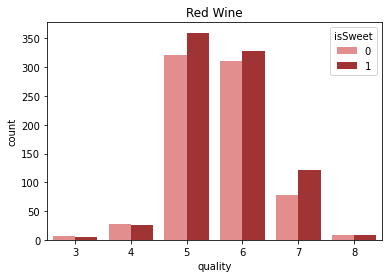

In [57]:
g = sns.countplot(data=data_r, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

No distinct pattern for red wines

## Variable Correlations

### White Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

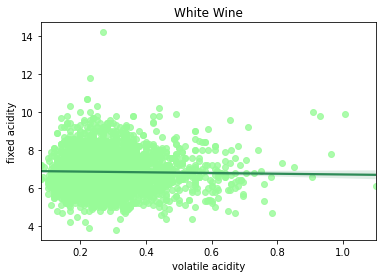

In [58]:
g = sns.regplot(data=data_w, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

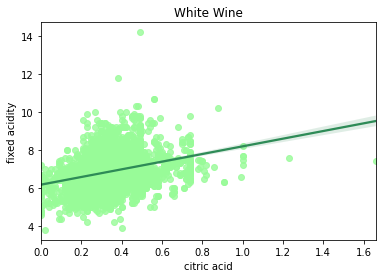

In [59]:
g = sns.regplot(data=data_w, x="citric acid", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

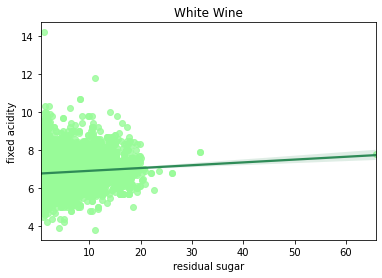

In [60]:
g = sns.regplot(data=data_w, x="residual sugar", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

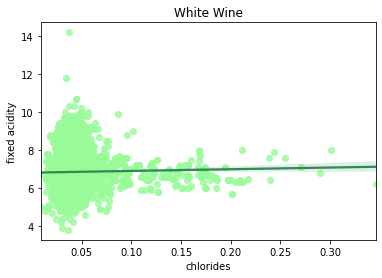

In [61]:
g = sns.regplot(data=data_w, x="chlorides", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

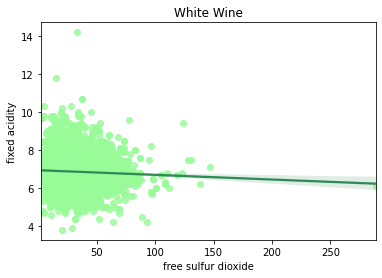

In [62]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

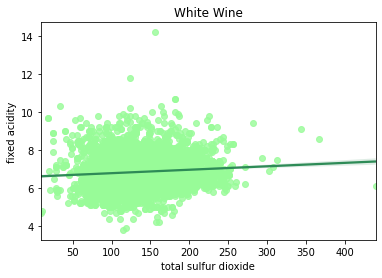

In [63]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

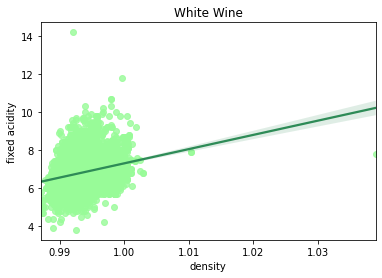

In [64]:
g = sns.regplot(data=data_w, x="density", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

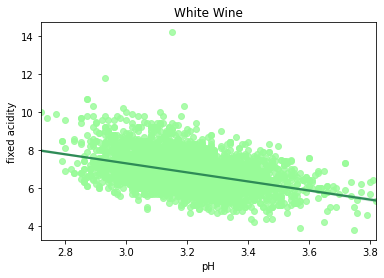

In [65]:
g = sns.regplot(data=data_w, x="pH", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

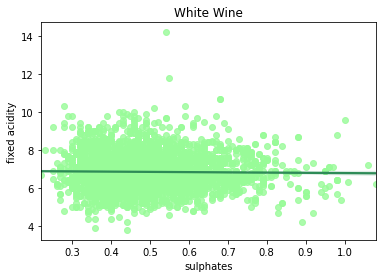

In [66]:
g = sns.regplot(data=data_w, x="sulphates", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

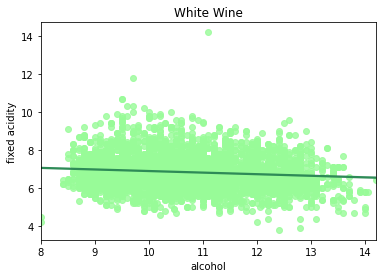

In [67]:
g = sns.regplot(data=data_w, x="alcohol", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Volatile Acidity]

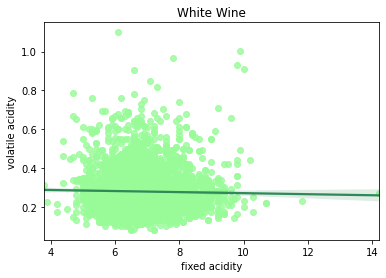

In [68]:
g = sns.regplot(data=data_w, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

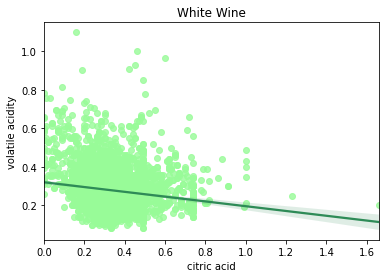

In [69]:
g = sns.regplot(data=data_w, x="citric acid", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

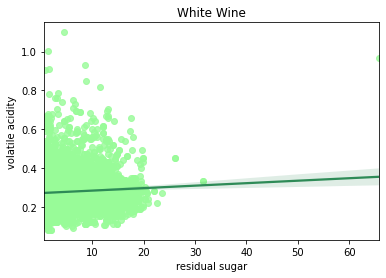

In [70]:
g = sns.regplot(data=data_w, x="residual sugar", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

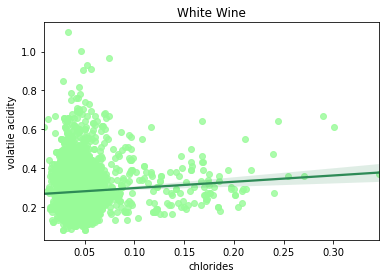

In [71]:
g = sns.regplot(data=data_w, x="chlorides", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

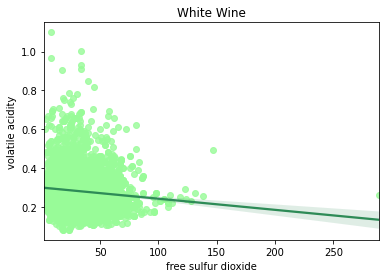

In [72]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

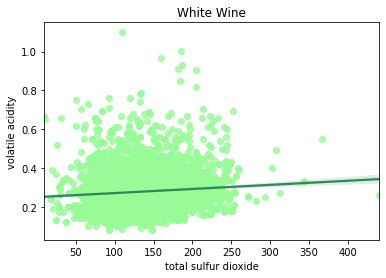

In [73]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

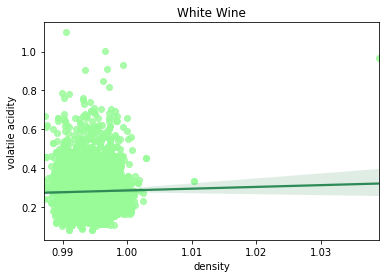

In [74]:
g = sns.regplot(data=data_w, x="density", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

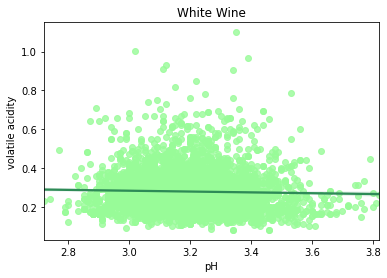

In [75]:
g = sns.regplot(data=data_w, x="pH", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

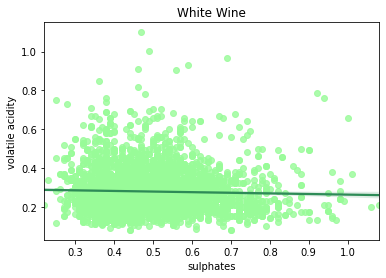

In [76]:
g = sns.regplot(data=data_w, x="sulphates", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

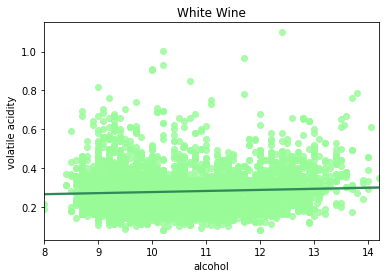

In [77]:
g = sns.regplot(data=data_w, x="alcohol", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Citric Acid]

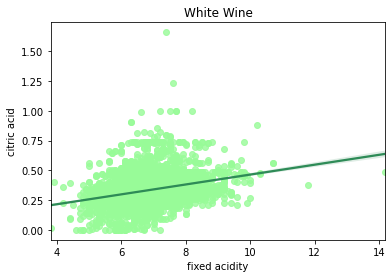

In [78]:
g = sns.regplot(data=data_w, x="fixed acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

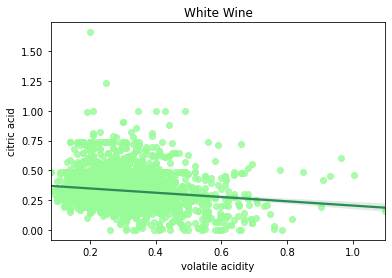

In [79]:
g = sns.regplot(data=data_w, x="volatile acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

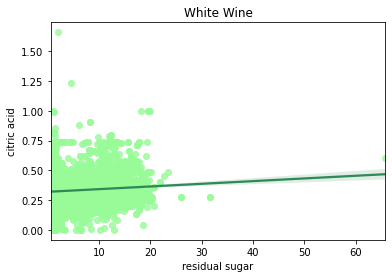

In [80]:
g = sns.regplot(data=data_w, x="residual sugar", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

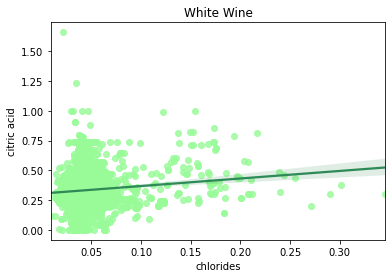

In [81]:
g = sns.regplot(data=data_w, x="chlorides", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

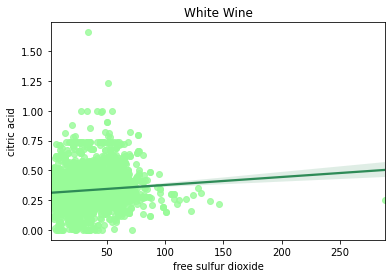

In [82]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

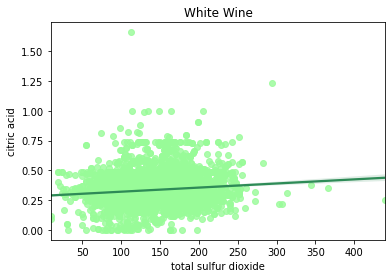

In [83]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

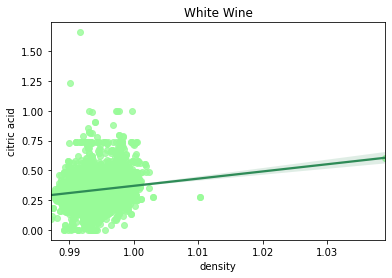

In [84]:
g = sns.regplot(data=data_w, x="density", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

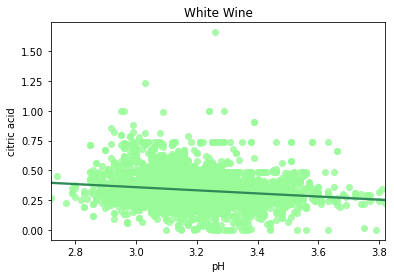

In [85]:
g = sns.regplot(data=data_w, x="pH", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

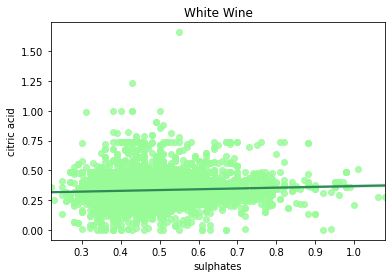

In [86]:
g = sns.regplot(data=data_w, x="sulphates", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

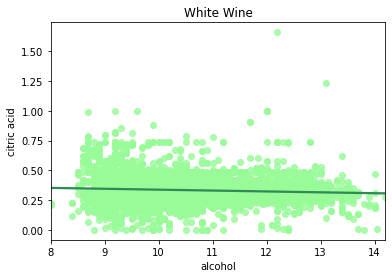

In [87]:
g = sns.regplot(data=data_w, x="alcohol", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Residual Sugar]

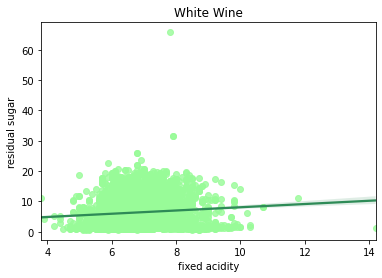

In [88]:
g = sns.regplot(data=data_w, x="fixed acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

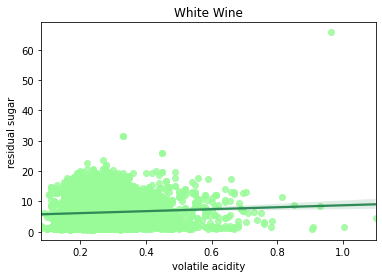

In [89]:
g = sns.regplot(data=data_w, x="volatile acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

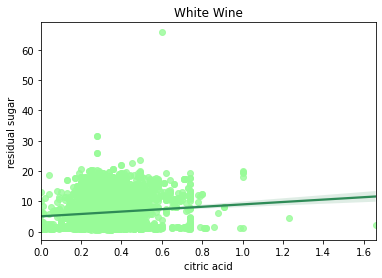

In [90]:
g = sns.regplot(data=data_w, x="citric acid", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

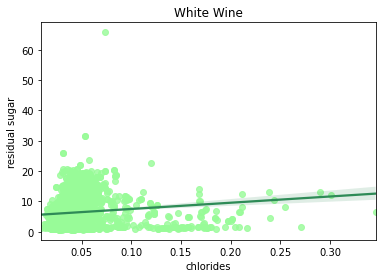

In [91]:
g = sns.regplot(data=data_w, x="chlorides", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

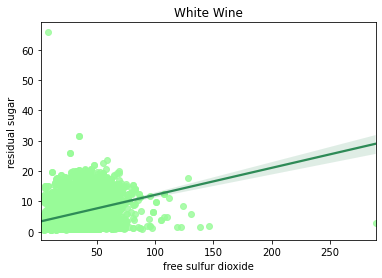

In [92]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

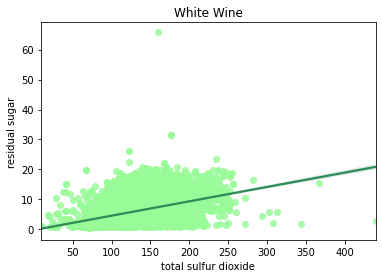

In [93]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

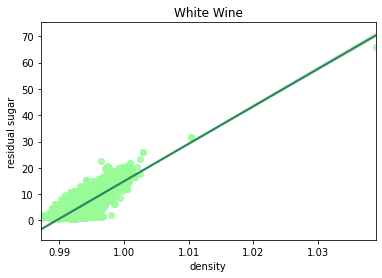

In [94]:
g = sns.regplot(data=data_w, x="density", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

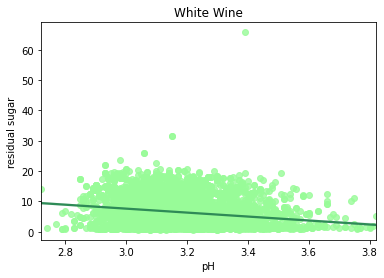

In [95]:
g = sns.regplot(data=data_w, x="pH", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

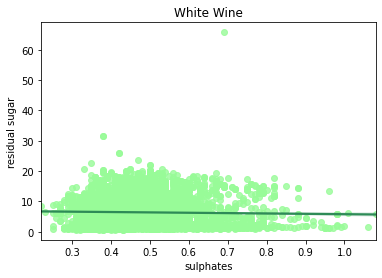

In [96]:
g = sns.regplot(data=data_w, x="sulphates", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

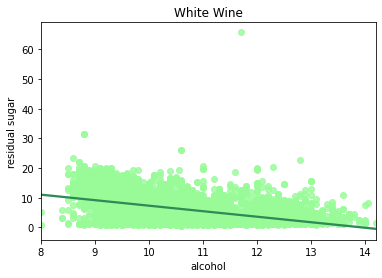

In [97]:
g = sns.regplot(data=data_w, x="alcohol", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Chlorides]

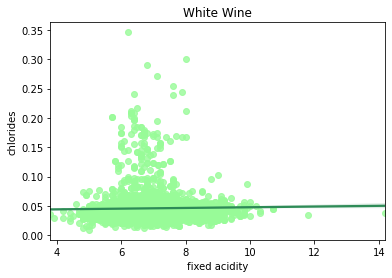

In [98]:
g = sns.regplot(data=data_w, x="fixed acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

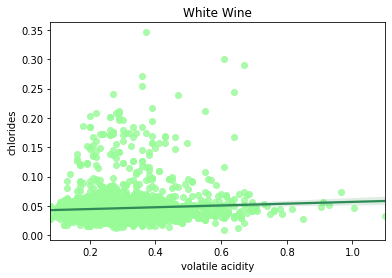

In [99]:
g = sns.regplot(data=data_w, x="volatile acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

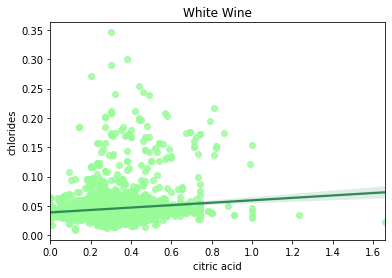

In [100]:
g = sns.regplot(data=data_w, x="citric acid", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

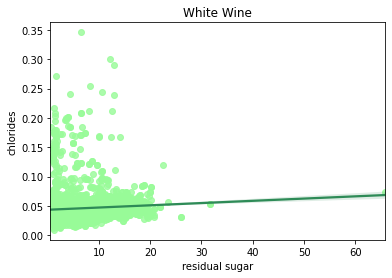

In [101]:
g = sns.regplot(data=data_w, x="residual sugar", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

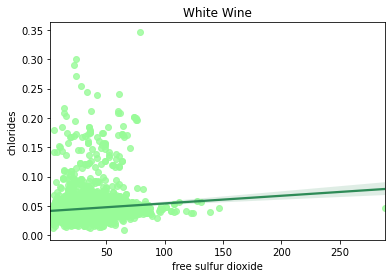

In [102]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

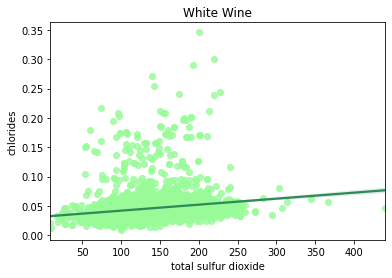

In [103]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

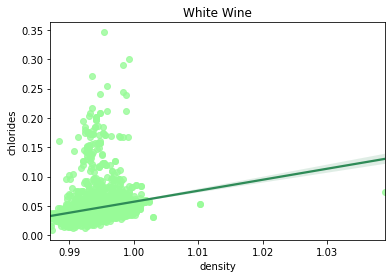

In [104]:
g = sns.regplot(data=data_w, x="density", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

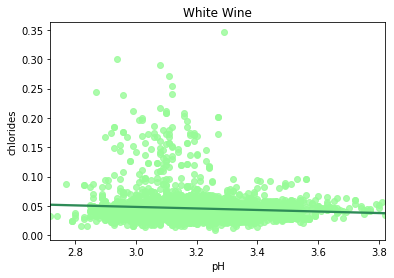

In [105]:
g = sns.regplot(data=data_w, x="pH", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

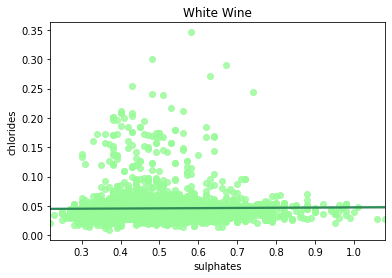

In [106]:
g = sns.regplot(data=data_w, x="sulphates", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

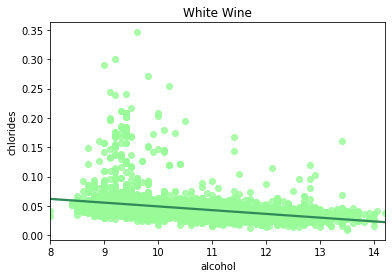

In [107]:
g = sns.regplot(data=data_w, x="alcohol", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Free Sulfur Dioxide]

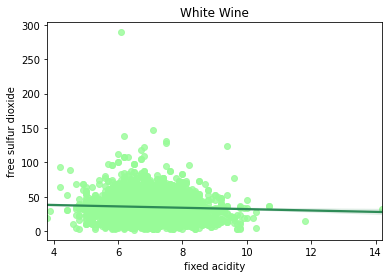

In [108]:
g = sns.regplot(data=data_w, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

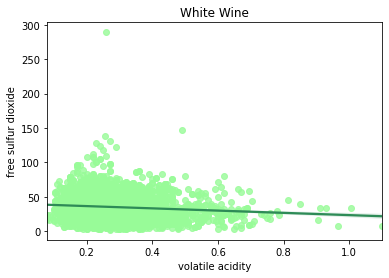

In [109]:
g = sns.regplot(data=data_w, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

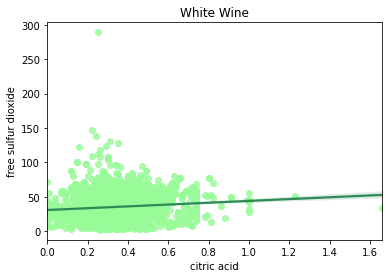

In [110]:
g = sns.regplot(data=data_w, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

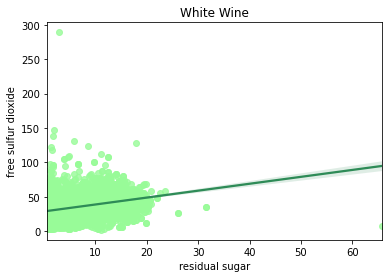

In [111]:
g = sns.regplot(data=data_w, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

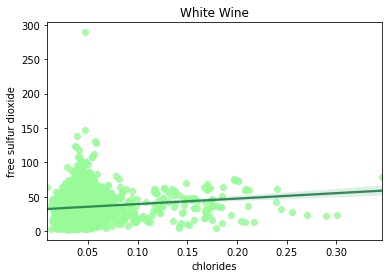

In [112]:
g = sns.regplot(data=data_w, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

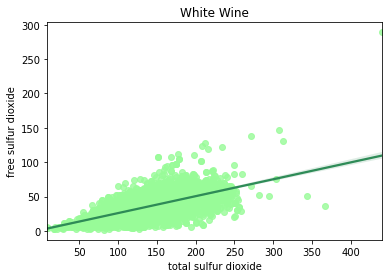

In [113]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

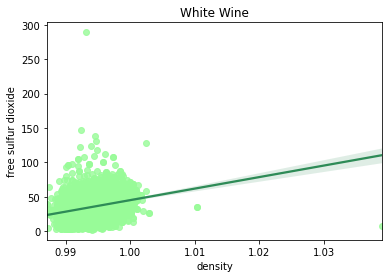

In [114]:
g = sns.regplot(data=data_w, x="density", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

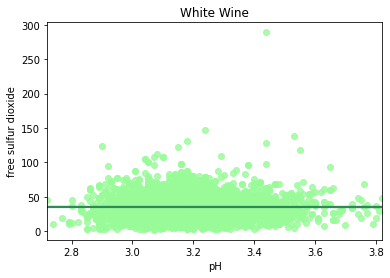

In [115]:
g = sns.regplot(data=data_w, x="pH", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

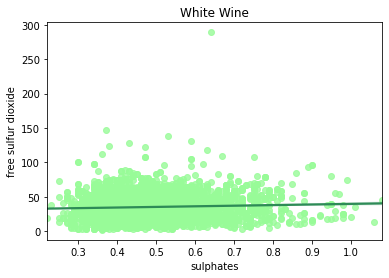

In [116]:
g = sns.regplot(data=data_w, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

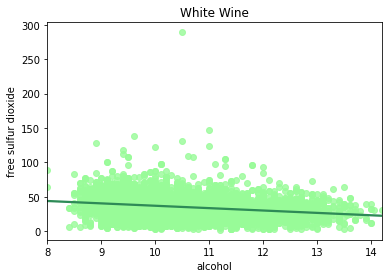

In [117]:
g = sns.regplot(data=data_w, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Total Sulfur Dioxide]

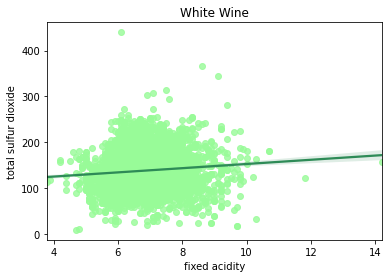

In [118]:
g = sns.regplot(data=data_w, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

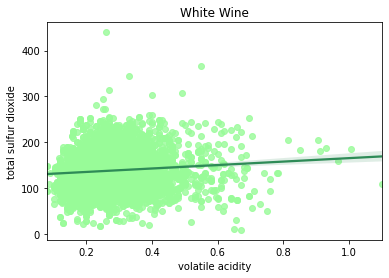

In [119]:
g = sns.regplot(data=data_w, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

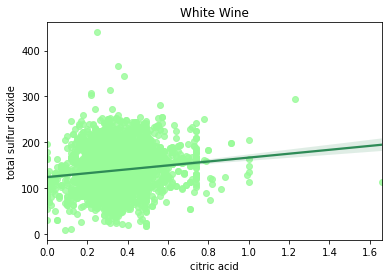

In [120]:
g = sns.regplot(data=data_w, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

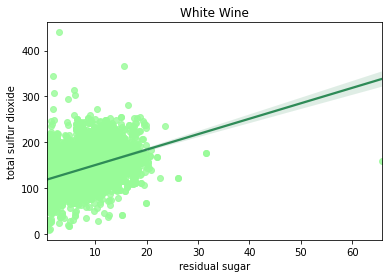

In [121]:
g = sns.regplot(data=data_w, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

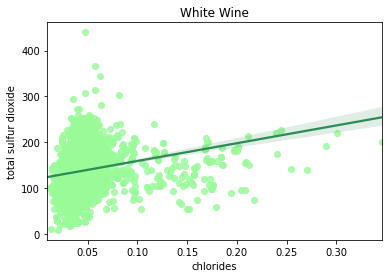

In [122]:
g = sns.regplot(data=data_w, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

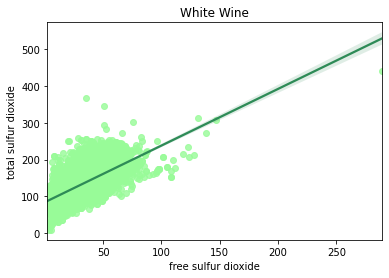

In [123]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

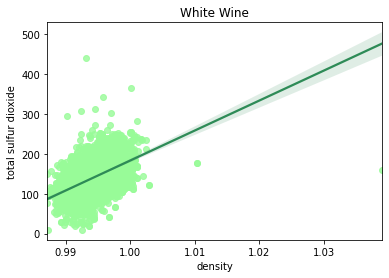

In [124]:
g = sns.regplot(data=data_w, x="density", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

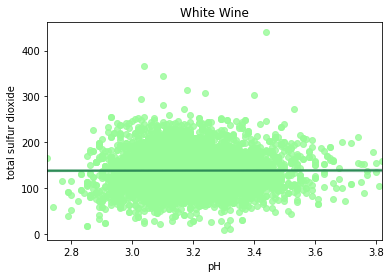

In [125]:
g = sns.regplot(data=data_w, x="pH", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

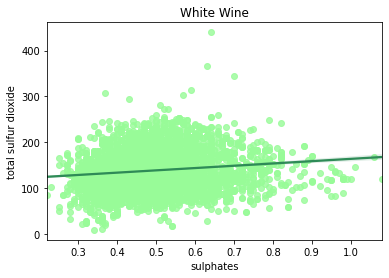

In [126]:
g = sns.regplot(data=data_w, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

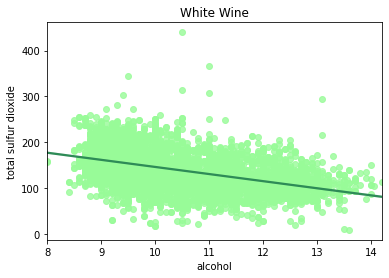

In [127]:
g = sns.regplot(data=data_w, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Density]

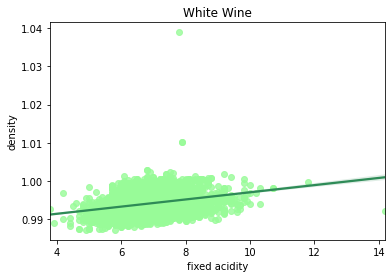

In [128]:
g = sns.regplot(data=data_w, x="fixed acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

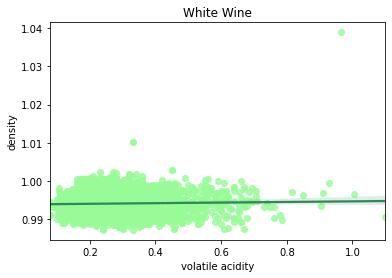

In [129]:
g = sns.regplot(data=data_w, x="volatile acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

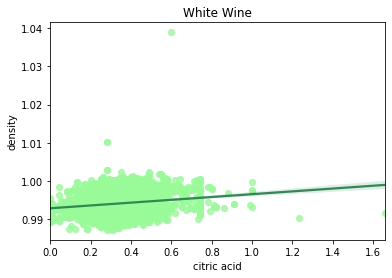

In [130]:
g = sns.regplot(data=data_w, x="citric acid", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

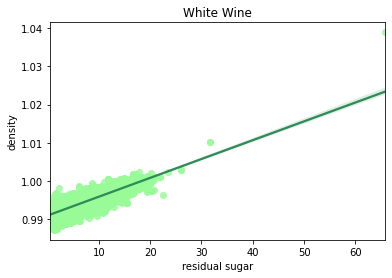

In [131]:
g = sns.regplot(data=data_w, x="residual sugar", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

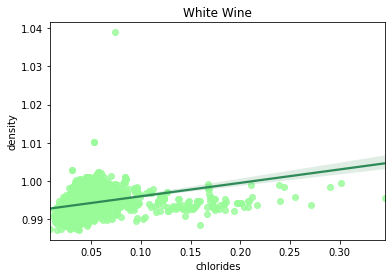

In [132]:
g = sns.regplot(data=data_w, x="chlorides", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

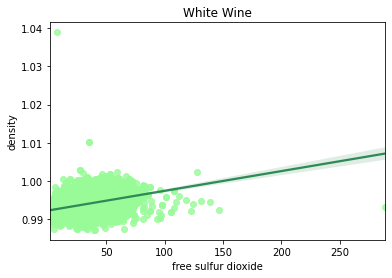

In [133]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

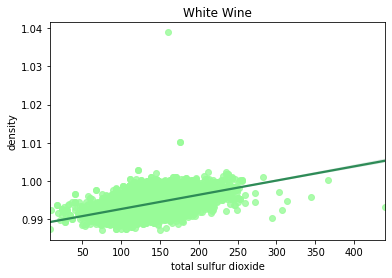

In [134]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

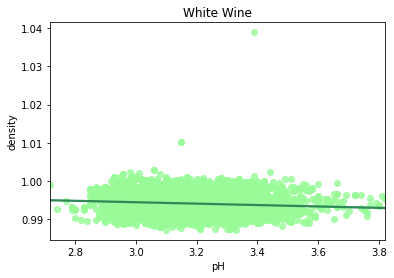

In [135]:
g = sns.regplot(data=data_w, x="pH", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

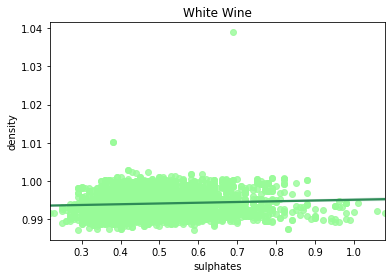

In [136]:
g = sns.regplot(data=data_w, x="sulphates", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

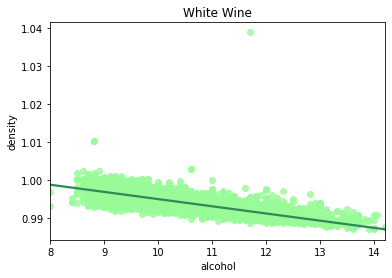

In [137]:
g = sns.regplot(data=data_w, x="alcohol", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [pH]

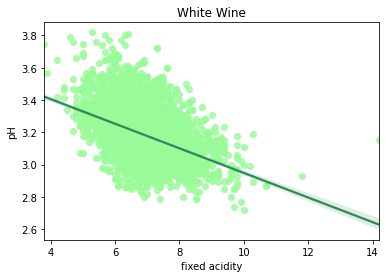

In [138]:
g = sns.regplot(data=data_w, x="fixed acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

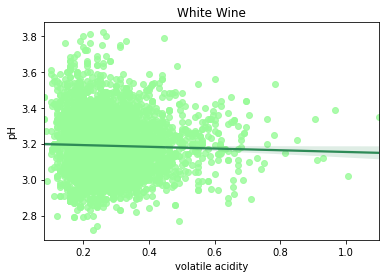

In [139]:
g = sns.regplot(data=data_w, x="volatile acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

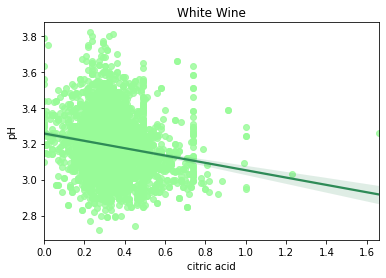

In [140]:
g = sns.regplot(data=data_w, x="citric acid", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

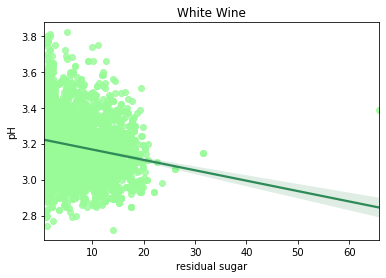

In [141]:
g = sns.regplot(data=data_w, x="residual sugar", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

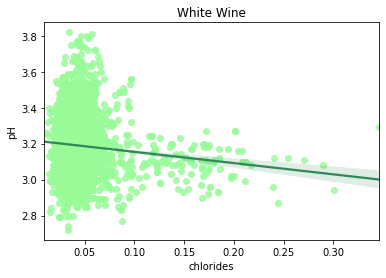

In [142]:
g = sns.regplot(data=data_w, x="chlorides", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

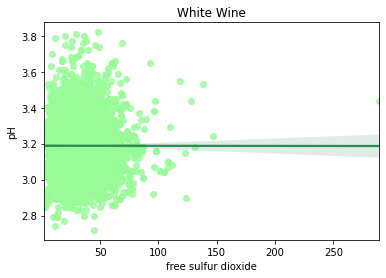

In [143]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

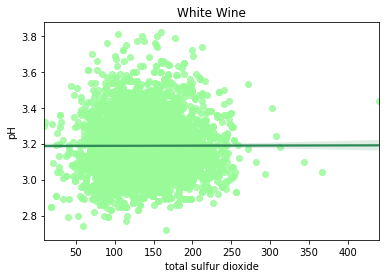

In [144]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

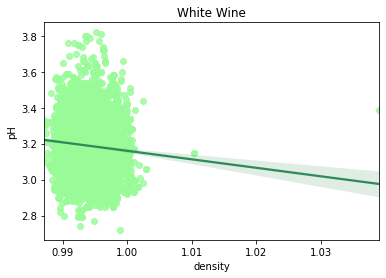

In [145]:
g = sns.regplot(data=data_w, x="density", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

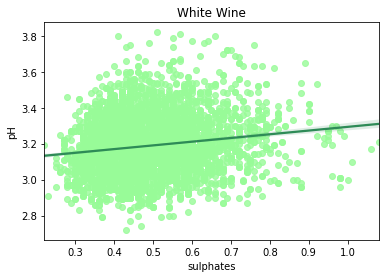

In [146]:
g = sns.regplot(data=data_w, x="sulphates", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

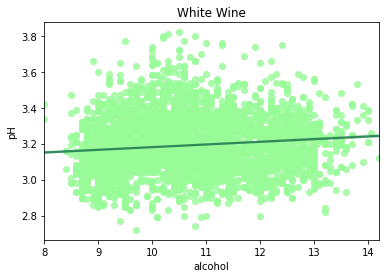

In [147]:
g = sns.regplot(data=data_w, x="alcohol", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Sulphates]

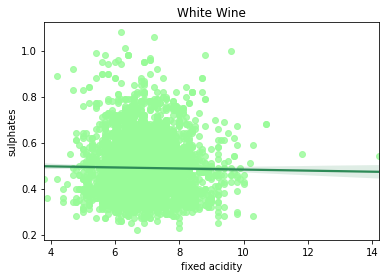

In [148]:
g = sns.regplot(data=data_w, x="fixed acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

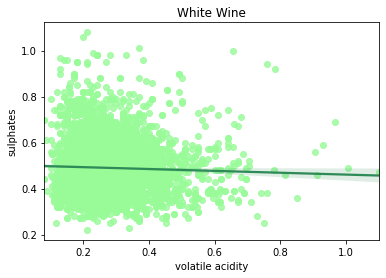

In [149]:
g = sns.regplot(data=data_w, x="volatile acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

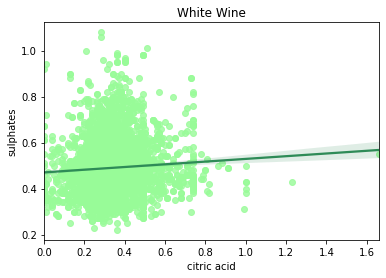

In [150]:
g = sns.regplot(data=data_w, x="citric acid", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

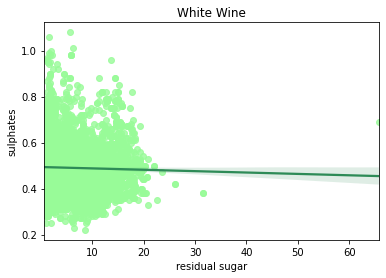

In [151]:
g = sns.regplot(data=data_w, x="residual sugar", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

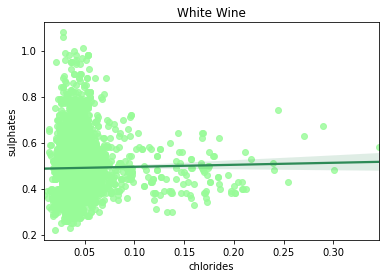

In [152]:
g = sns.regplot(data=data_w, x="chlorides", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

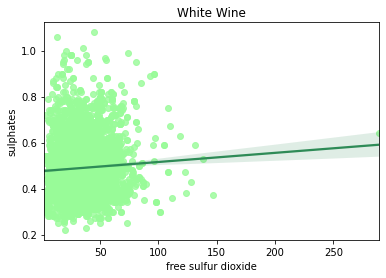

In [153]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

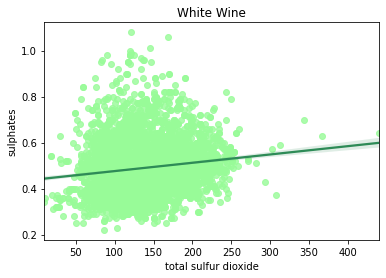

In [154]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

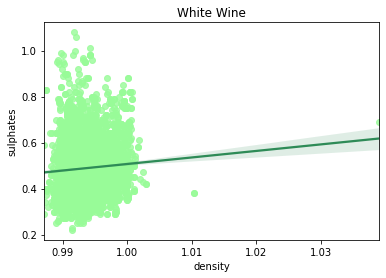

In [155]:
g = sns.regplot(data=data_w, x="density", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

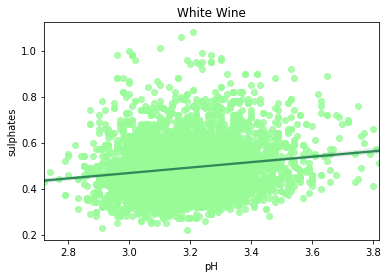

In [156]:
g = sns.regplot(data=data_w, x="pH", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

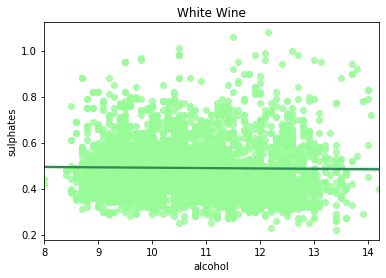

In [157]:
g = sns.regplot(data=data_w, x="alcohol", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Alcohol]

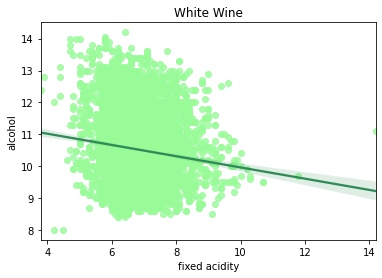

In [158]:
g = sns.regplot(data=data_w, x="fixed acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

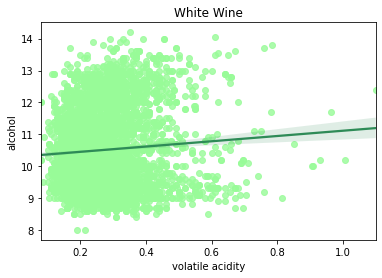

In [159]:
g = sns.regplot(data=data_w, x="volatile acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

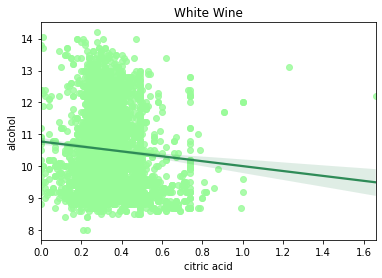

In [160]:
g = sns.regplot(data=data_w, x="citric acid", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

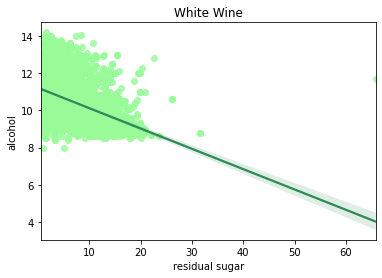

In [161]:
g = sns.regplot(data=data_w, x="residual sugar", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

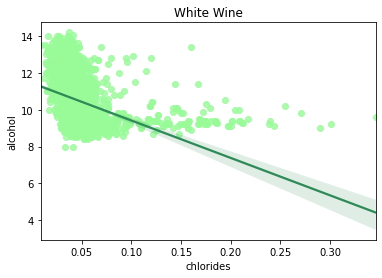

In [162]:
g = sns.regplot(data=data_w, x="chlorides", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

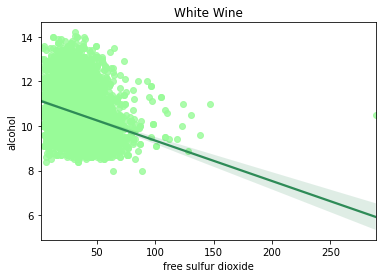

In [163]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

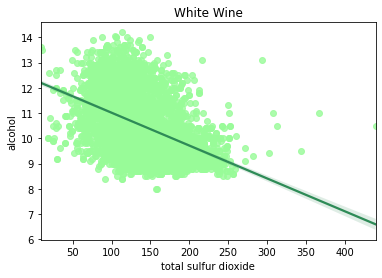

In [164]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

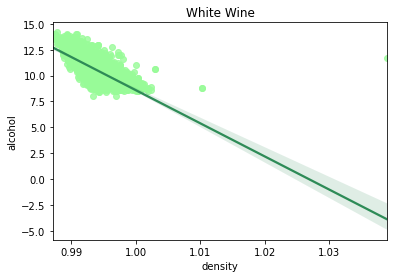

In [165]:
g = sns.regplot(data=data_w, x="density", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

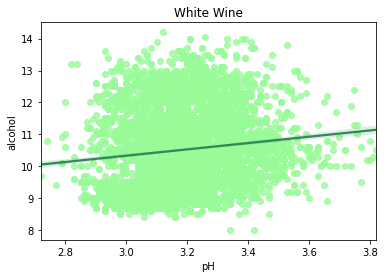

In [166]:
g = sns.regplot(data=data_w, x="pH", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

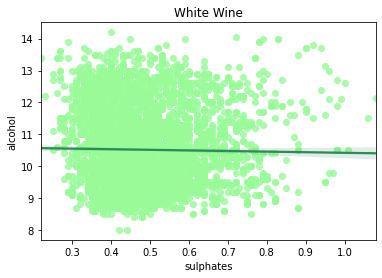

In [167]:
g = sns.regplot(data=data_w, x="sulphates", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

#### Categorical Scatterplots for Quality

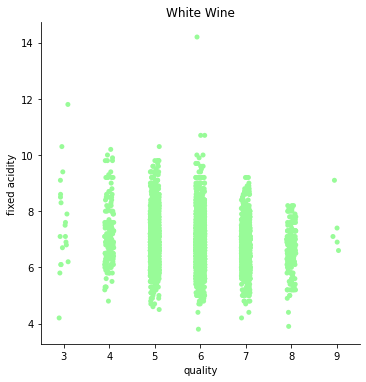

In [168]:
g = sns.catplot(data=data_w, x="quality", y="fixed acidity", color="palegreen").set(title = "White Wine")

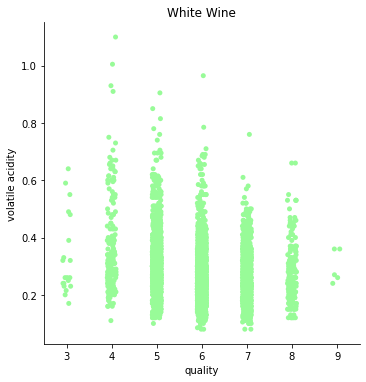

In [169]:
g = sns.catplot(data=data_w, x="quality", y="volatile acidity", color="palegreen").set(title = "White Wine")

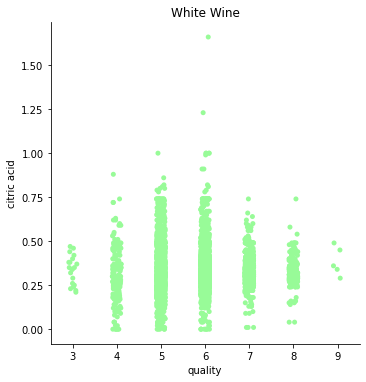

In [170]:
g = sns.catplot(data=data_w, x="quality", y="citric acid", color="palegreen").set(title = "White Wine")

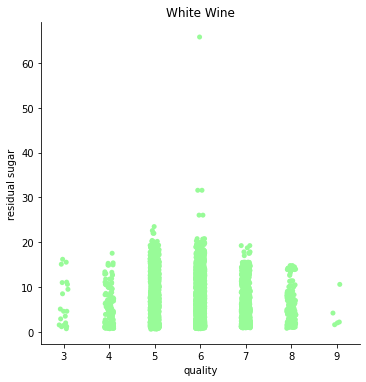

In [171]:
g = sns.catplot(data=data_w, x="quality", y="residual sugar", color="palegreen").set(title = "White Wine")

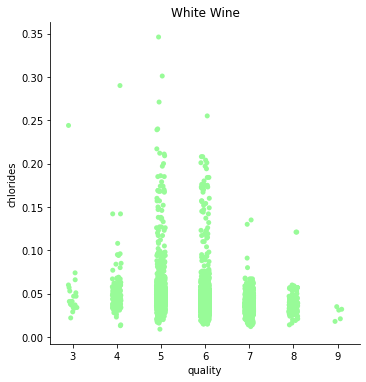

In [172]:
g = sns.catplot(data=data_w, x="quality", y="chlorides", color="palegreen").set(title = "White Wine")

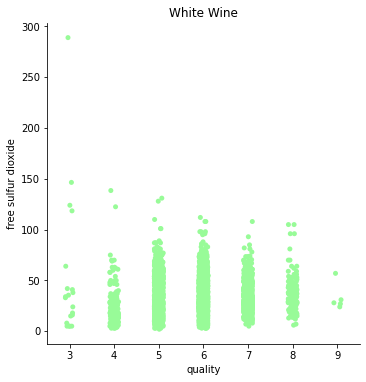

In [173]:
g = sns.catplot(data=data_w, x="quality", y="free sulfur dioxide", color="palegreen").set(title = "White Wine")

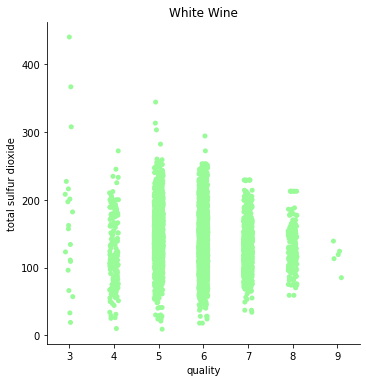

In [174]:
g = sns.catplot(data=data_w, x="quality", y="total sulfur dioxide", color="palegreen").set(title = "White Wine")

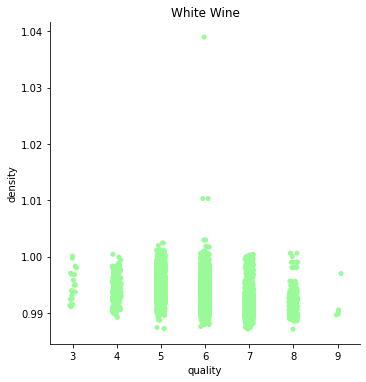

In [175]:
g = sns.catplot(data=data_w, x="quality", y="density", color="palegreen").set(title = "White Wine")

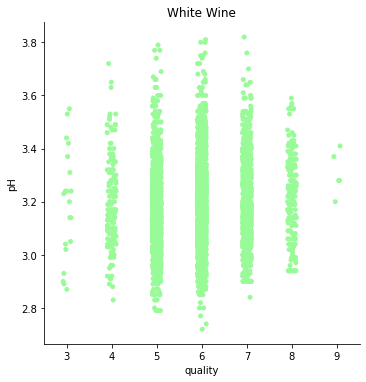

In [176]:
g = sns.catplot(data=data_w, x="quality", y="pH", color="palegreen").set(title = "White Wine")

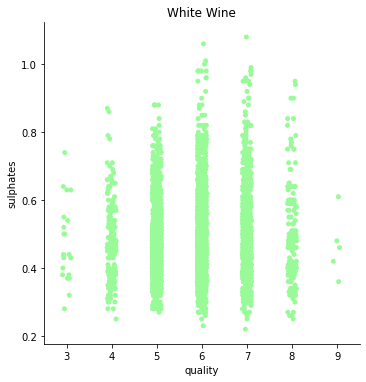

In [177]:
g = sns.catplot(data=data_w, x="quality", y="sulphates", color="palegreen").set(title = "White Wine")

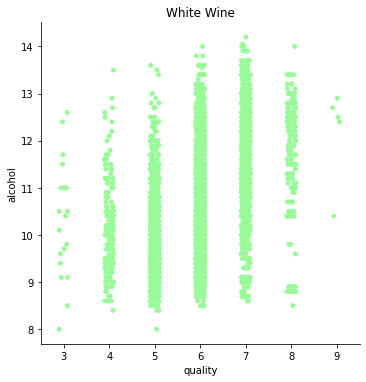

In [178]:
g = sns.catplot(data=data_w, x="quality", y="alcohol", color="palegreen").set(title = "White Wine")

#### Correlation Matrix

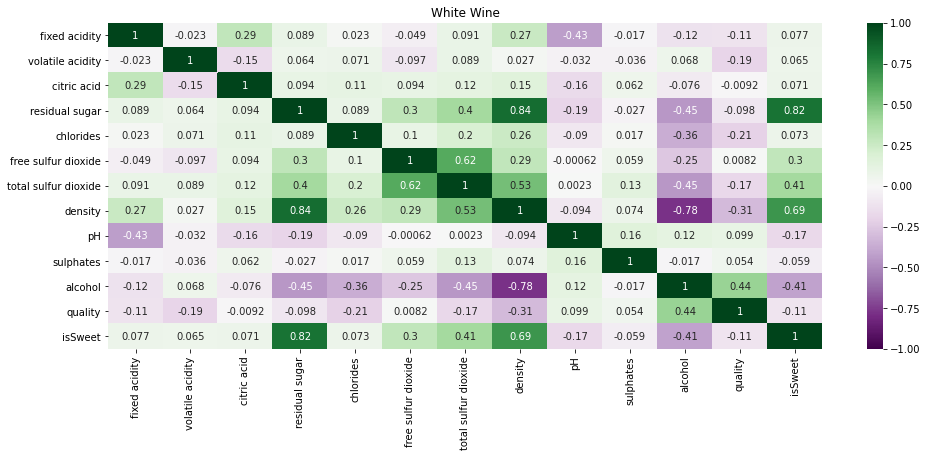

In [179]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_w.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn').set(title = "White Wine")

Alcohol content and density have the strongest correlations with quality

### Red Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

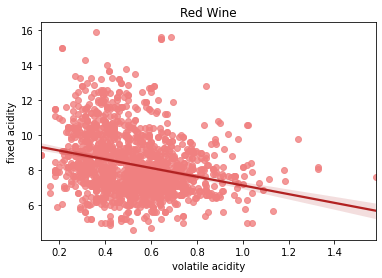

In [180]:
g = sns.regplot(data=data_r, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

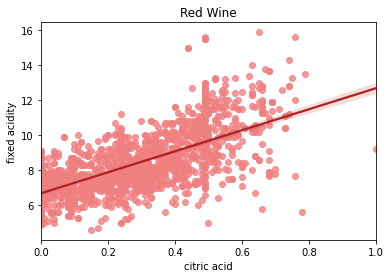

In [181]:
g = sns.regplot(data=data_r, x="citric acid", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

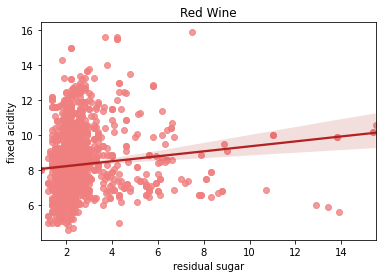

In [182]:
g = sns.regplot(data=data_r, x="residual sugar", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

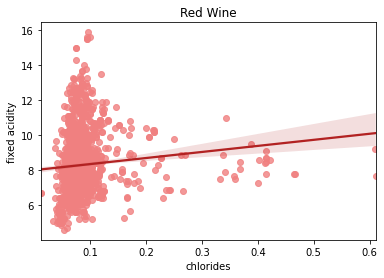

In [183]:
g = sns.regplot(data=data_r, x="chlorides", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

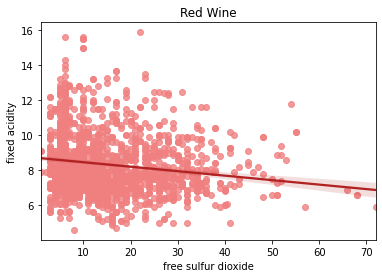

In [184]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

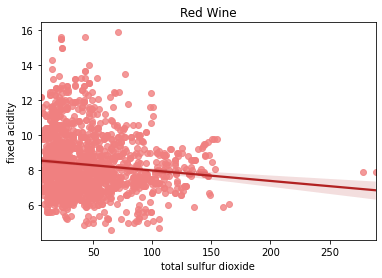

In [185]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

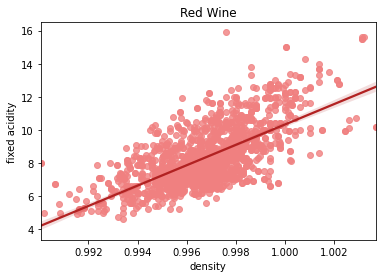

In [186]:
g = sns.regplot(data=data_r, x="density", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

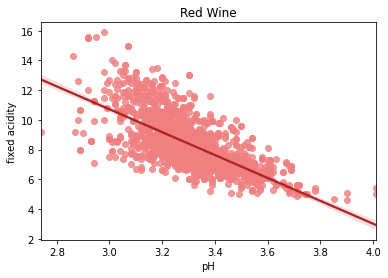

In [187]:
g = sns.regplot(data=data_r, x="pH", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

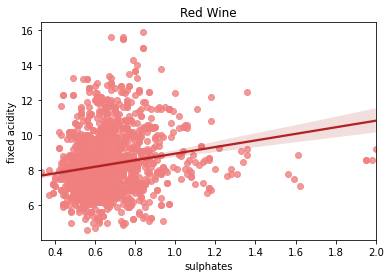

In [188]:
g = sns.regplot(data=data_r, x="sulphates", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

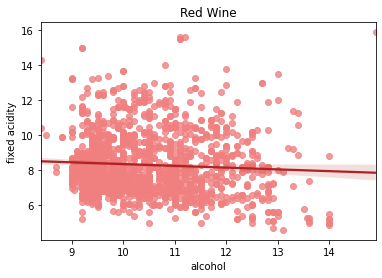

In [189]:
g = sns.regplot(data=data_r, x="alcohol", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Volatile Acidity]

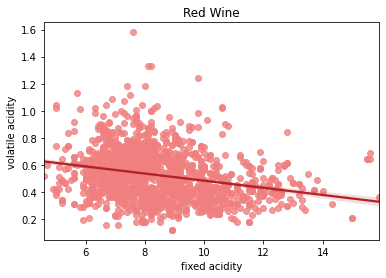

In [190]:
g = sns.regplot(data=data_r, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

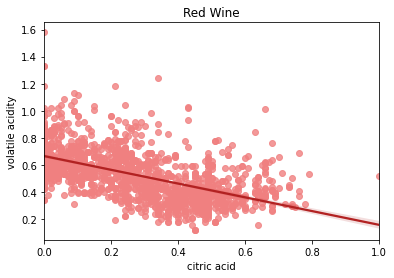

In [191]:
g = sns.regplot(data=data_r, x="citric acid", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

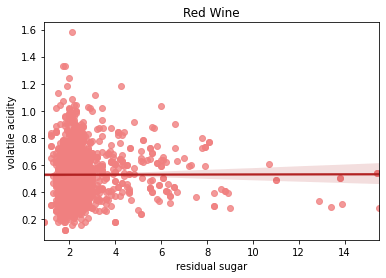

In [192]:
g = sns.regplot(data=data_r, x="residual sugar", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

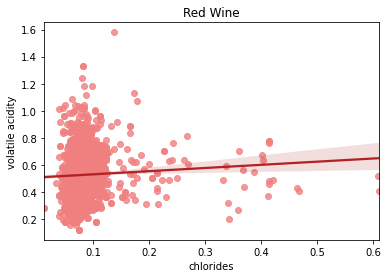

In [193]:
g = sns.regplot(data=data_r, x="chlorides", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

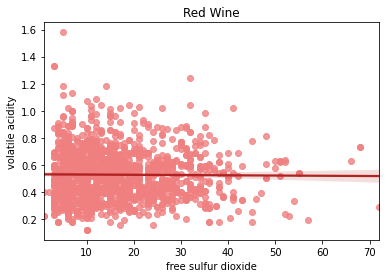

In [194]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

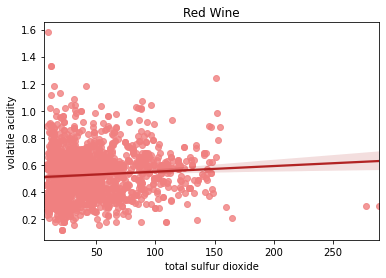

In [195]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

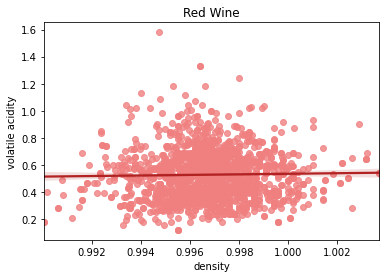

In [196]:
g = sns.regplot(data=data_r, x="density", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

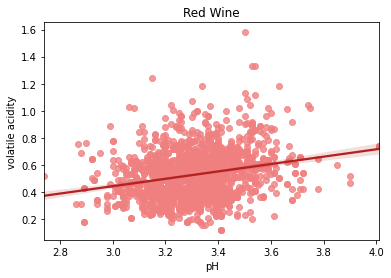

In [197]:
g = sns.regplot(data=data_r, x="pH", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

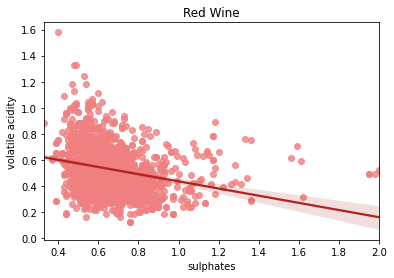

In [198]:
g = sns.regplot(data=data_r, x="sulphates", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

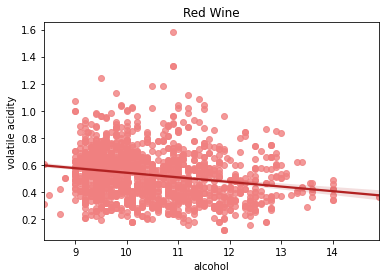

In [199]:
g = sns.regplot(data=data_r, x="alcohol", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Citric Acid]

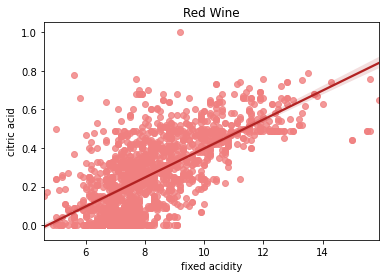

In [200]:
g = sns.regplot(data=data_r, x="fixed acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

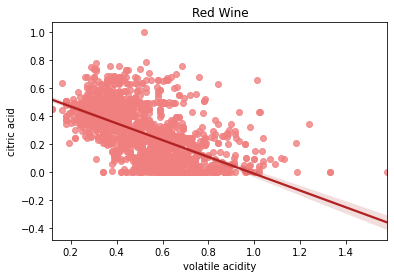

In [201]:
g = sns.regplot(data=data_r, x="volatile acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

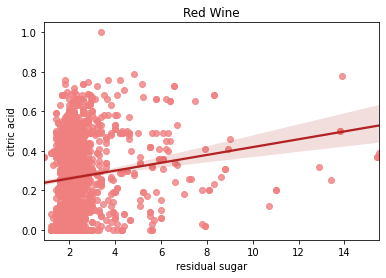

In [202]:
g = sns.regplot(data=data_r, x="residual sugar", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

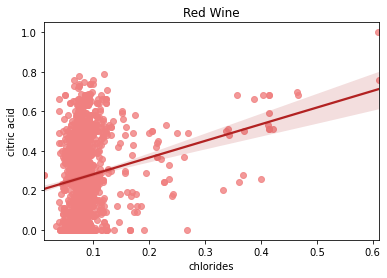

In [203]:
g = sns.regplot(data=data_r, x="chlorides", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

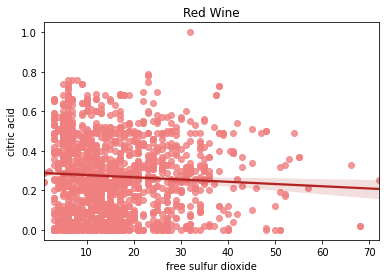

In [204]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

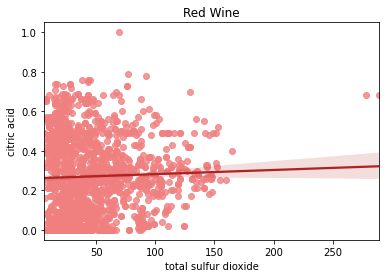

In [205]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

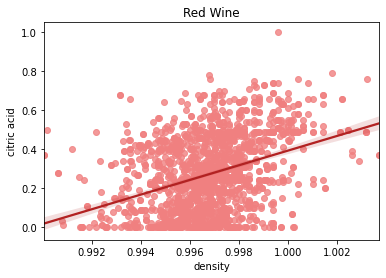

In [206]:
g = sns.regplot(data=data_r, x="density", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

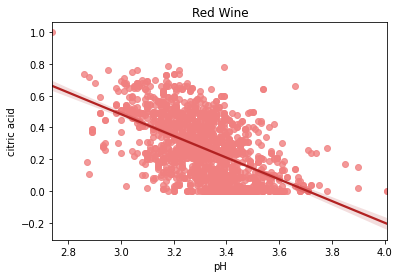

In [207]:
g = sns.regplot(data=data_r, x="pH", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

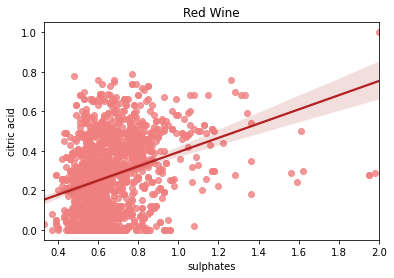

In [208]:
g = sns.regplot(data=data_r, x="sulphates", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

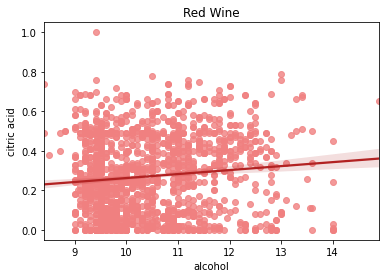

In [209]:
g = sns.regplot(data=data_r, x="alcohol", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Residual Sugar]

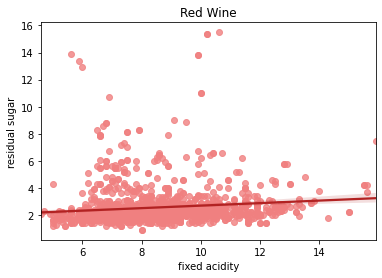

In [210]:
g = sns.regplot(data=data_r, x="fixed acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

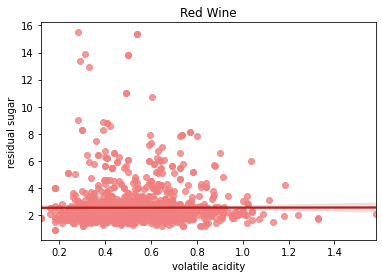

In [211]:
g = sns.regplot(data=data_r, x="volatile acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

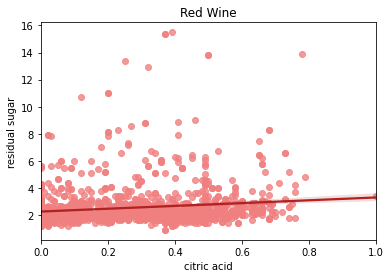

In [212]:
g = sns.regplot(data=data_r, x="citric acid", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

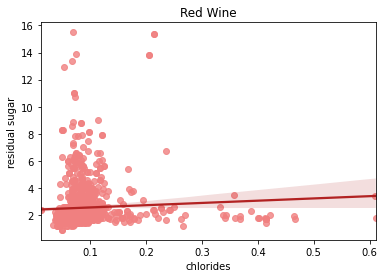

In [213]:
g = sns.regplot(data=data_r, x="chlorides", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

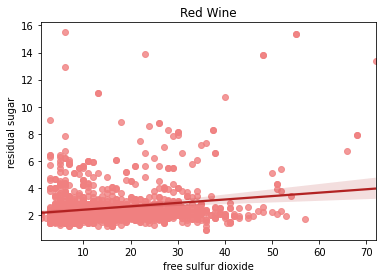

In [214]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

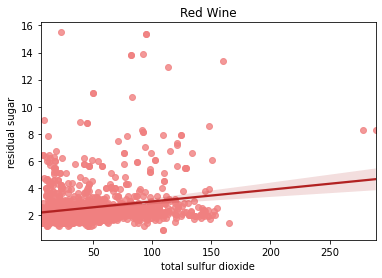

In [215]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

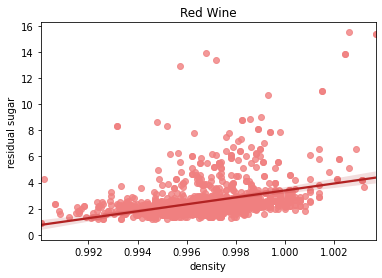

In [216]:
g = sns.regplot(data=data_r, x="density", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

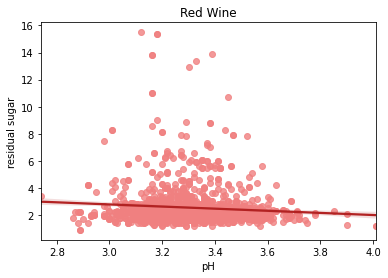

In [217]:
g = sns.regplot(data=data_r, x="pH", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

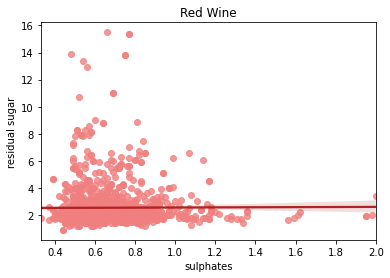

In [218]:
g = sns.regplot(data=data_r, x="sulphates", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

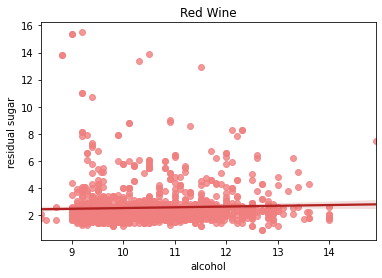

In [219]:
g = sns.regplot(data=data_r, x="alcohol", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Chlorides]

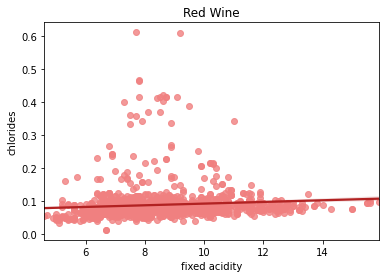

In [220]:
g = sns.regplot(data=data_r, x="fixed acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

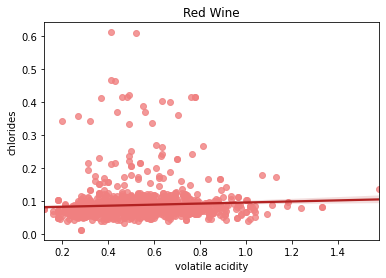

In [221]:
g = sns.regplot(data=data_r, x="volatile acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

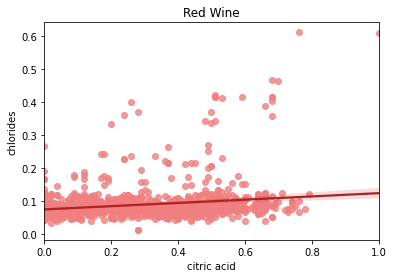

In [222]:
g = sns.regplot(data=data_r, x="citric acid", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

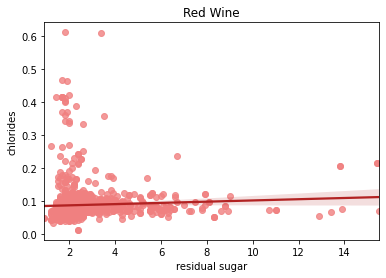

In [223]:
g = sns.regplot(data=data_r, x="residual sugar", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

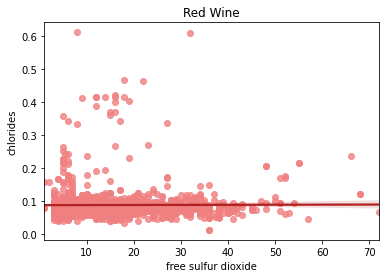

In [224]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

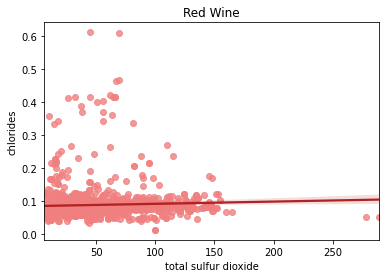

In [225]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

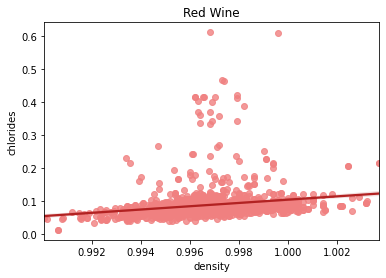

In [226]:
g = sns.regplot(data=data_r, x="density", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

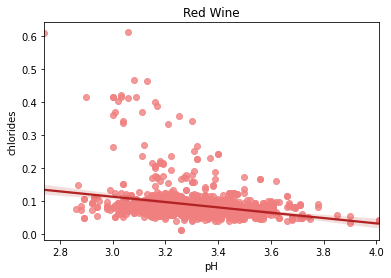

In [227]:
g = sns.regplot(data=data_r, x="pH", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

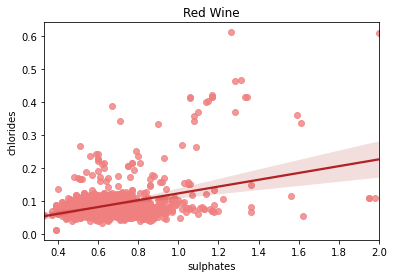

In [228]:
g = sns.regplot(data=data_r, x="sulphates", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

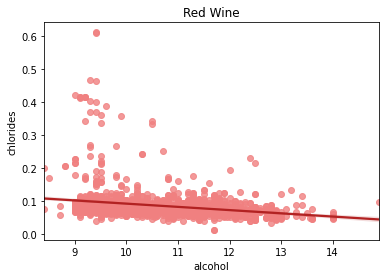

In [229]:
g = sns.regplot(data=data_r, x="alcohol", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Free Sulfur Dioxide]

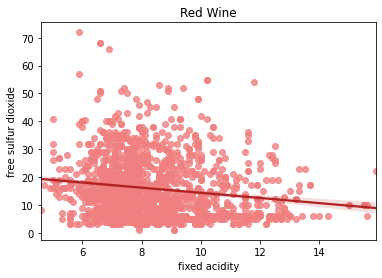

In [230]:
g = sns.regplot(data=data_r, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

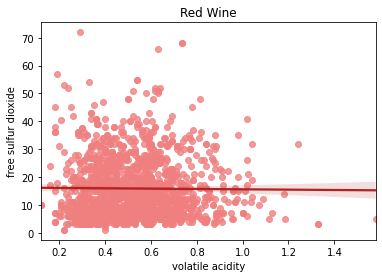

In [231]:
g = sns.regplot(data=data_r, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

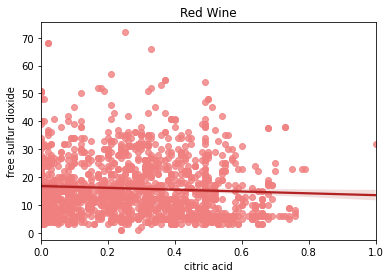

In [232]:
g = sns.regplot(data=data_r, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

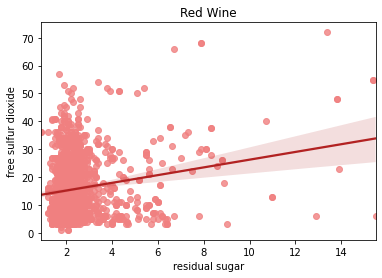

In [233]:
g = sns.regplot(data=data_r, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

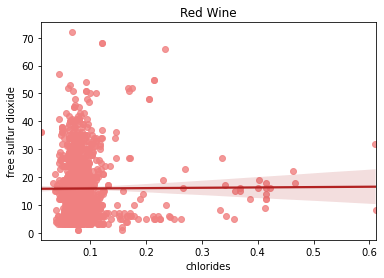

In [234]:
g = sns.regplot(data=data_r, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

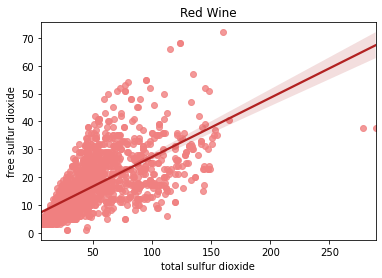

In [235]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

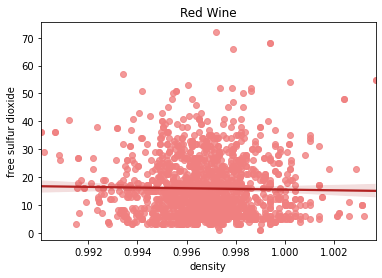

In [236]:
g = sns.regplot(data=data_r, x="density", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

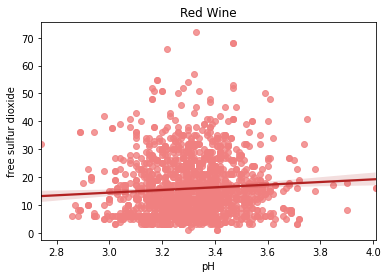

In [237]:
g = sns.regplot(data=data_r, x="pH", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

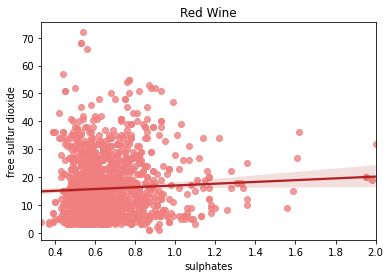

In [238]:
g = sns.regplot(data=data_r, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

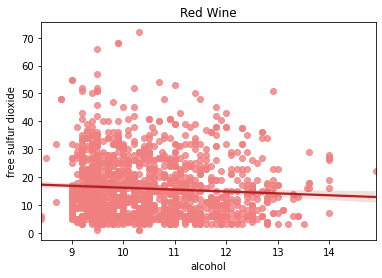

In [239]:
g = sns.regplot(data=data_r, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Total Sulfur Dioxide]

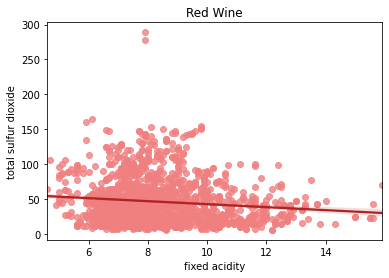

In [240]:
g = sns.regplot(data=data_r, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

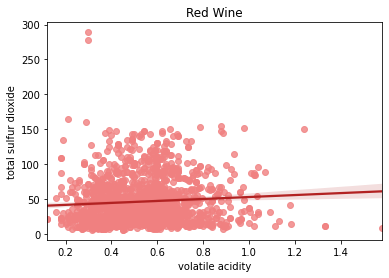

In [241]:
g = sns.regplot(data=data_r, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

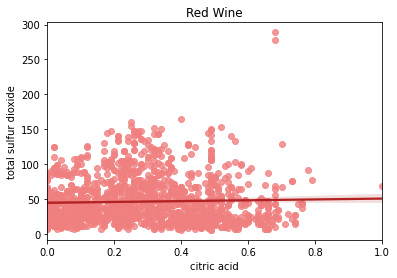

In [242]:
g = sns.regplot(data=data_r, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

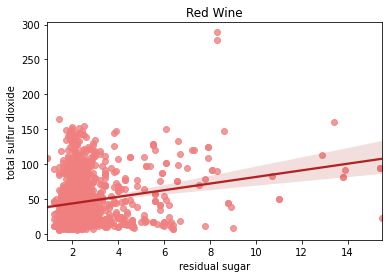

In [243]:
g = sns.regplot(data=data_r, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

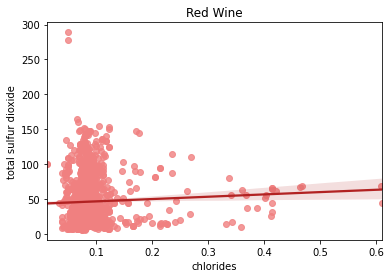

In [244]:
g = sns.regplot(data=data_r, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

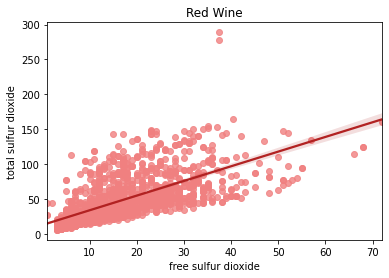

In [245]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

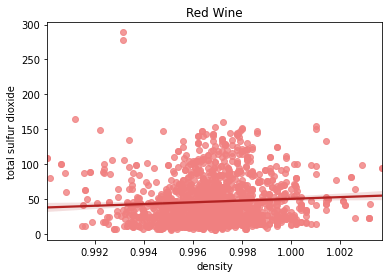

In [246]:
g = sns.regplot(data=data_r, x="density", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

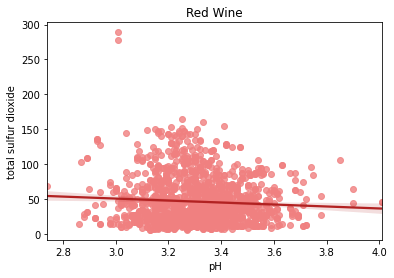

In [247]:
g = sns.regplot(data=data_r, x="pH", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

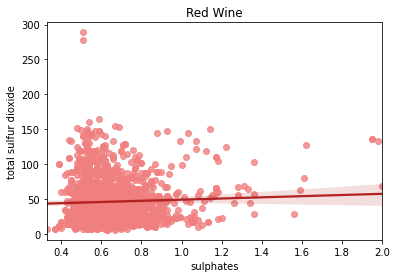

In [248]:
g = sns.regplot(data=data_r, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

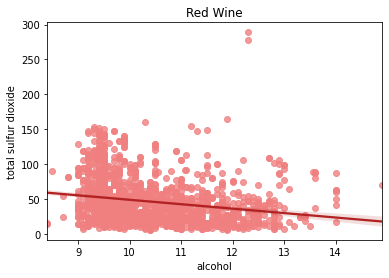

In [249]:
g = sns.regplot(data=data_r, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Density]

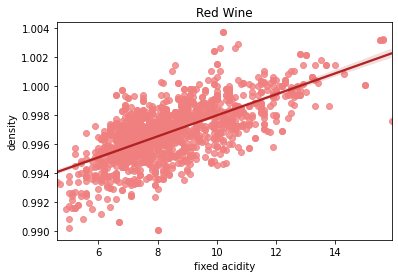

In [250]:
g = sns.regplot(data=data_r, x="fixed acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

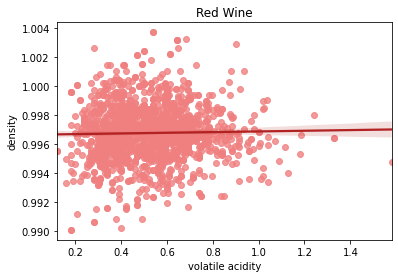

In [251]:
g = sns.regplot(data=data_r, x="volatile acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

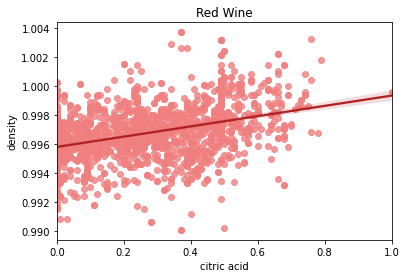

In [252]:
g = sns.regplot(data=data_r, x="citric acid", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

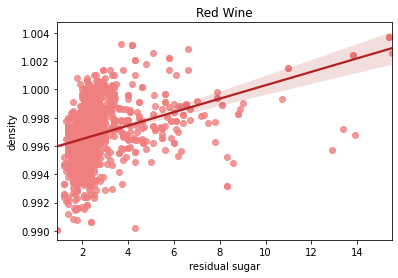

In [253]:
g = sns.regplot(data=data_r, x="residual sugar", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

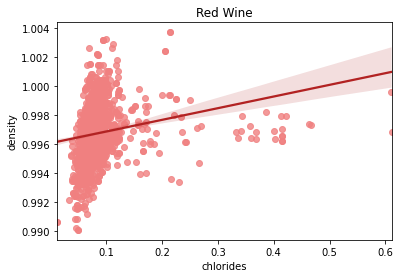

In [254]:
g = sns.regplot(data=data_r, x="chlorides", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

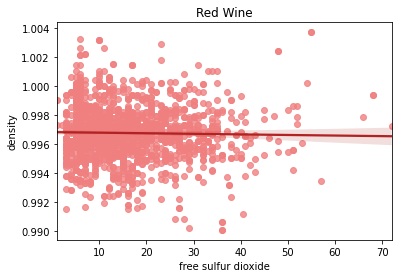

In [255]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

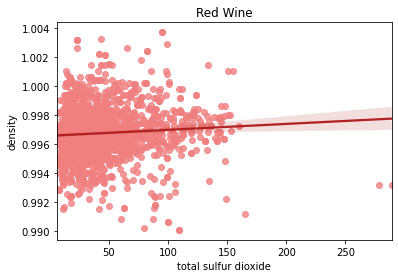

In [256]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

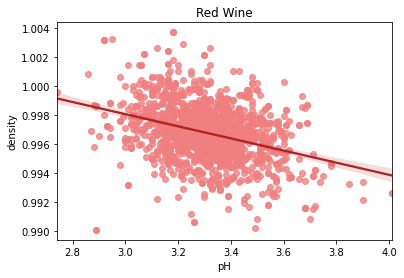

In [257]:
g = sns.regplot(data=data_r, x="pH", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

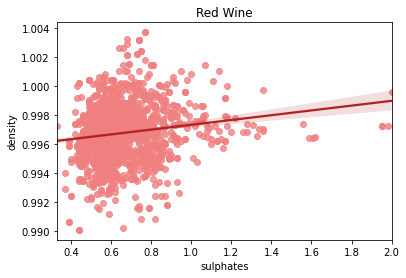

In [258]:
g = sns.regplot(data=data_r, x="sulphates", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

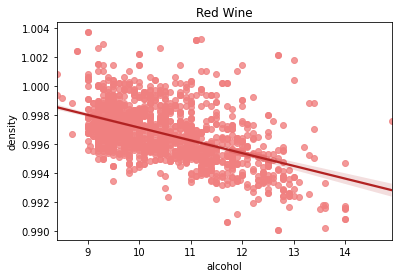

In [259]:
g = sns.regplot(data=data_r, x="alcohol", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [pH]

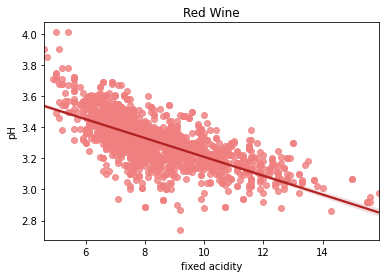

In [260]:
g = sns.regplot(data=data_r, x="fixed acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

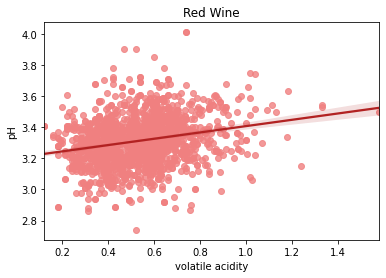

In [261]:
g = sns.regplot(data=data_r, x="volatile acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

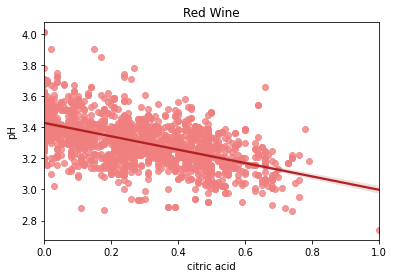

In [262]:
g = sns.regplot(data=data_r, x="citric acid", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

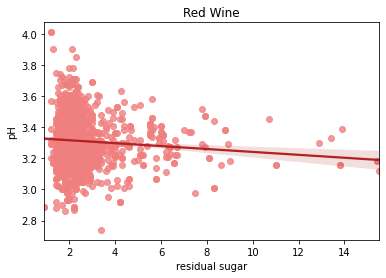

In [263]:
g = sns.regplot(data=data_r, x="residual sugar", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

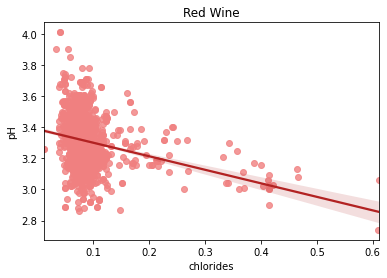

In [264]:
g = sns.regplot(data=data_r, x="chlorides", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

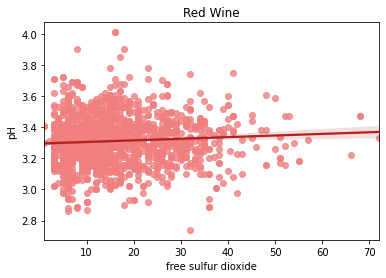

In [265]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

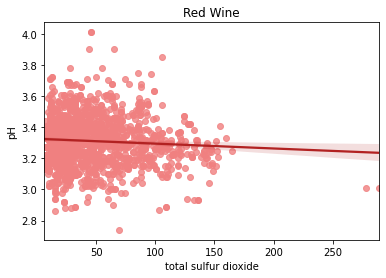

In [266]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

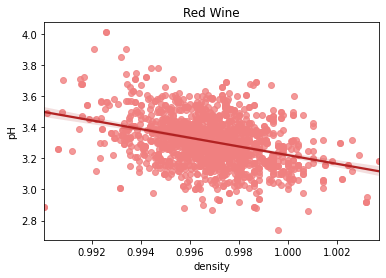

In [267]:
g = sns.regplot(data=data_r, x="density", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

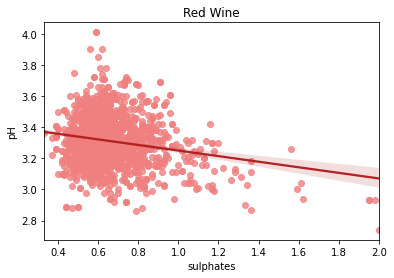

In [268]:
g = sns.regplot(data=data_r, x="sulphates", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

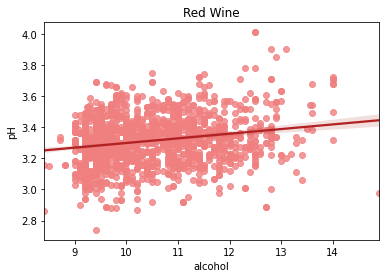

In [269]:
g = sns.regplot(data=data_r, x="alcohol", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Sulphates]

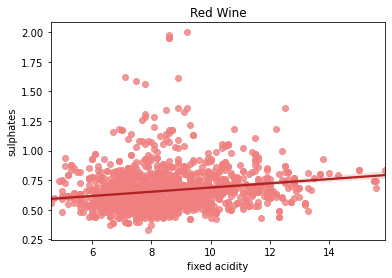

In [270]:
g = sns.regplot(data=data_r, x="fixed acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

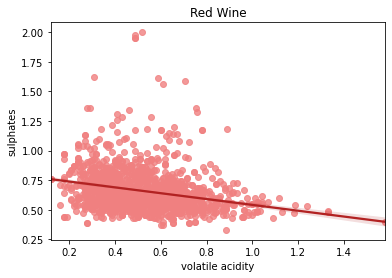

In [271]:
g = sns.regplot(data=data_r, x="volatile acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

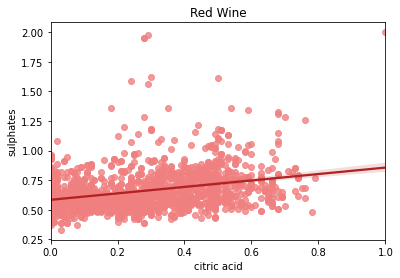

In [272]:
g = sns.regplot(data=data_r, x="citric acid", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

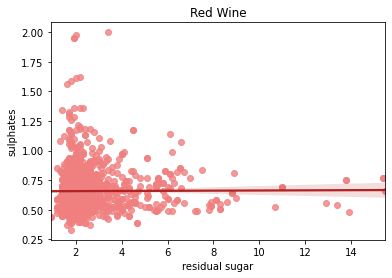

In [273]:
g = sns.regplot(data=data_r, x="residual sugar", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

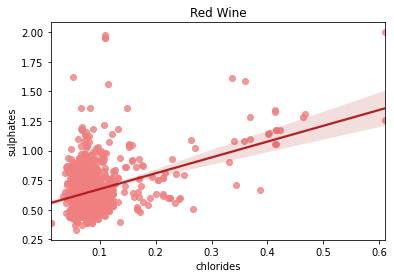

In [274]:
g = sns.regplot(data=data_r, x="chlorides", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

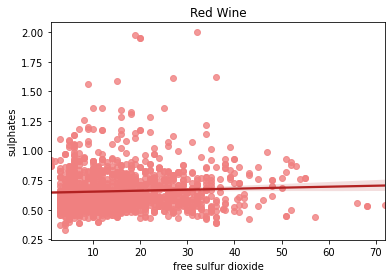

In [275]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

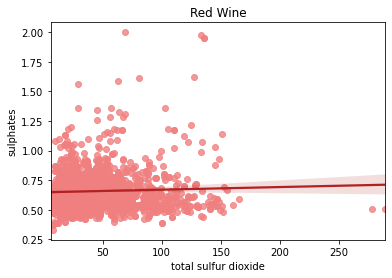

In [276]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

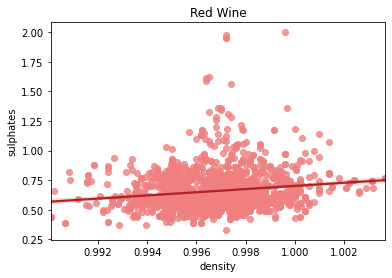

In [277]:
g = sns.regplot(data=data_r, x="density", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

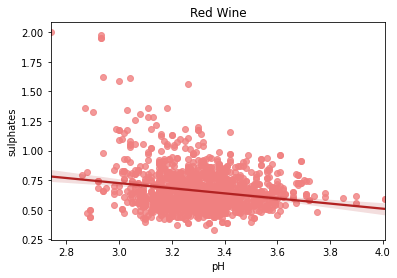

In [278]:
g = sns.regplot(data=data_r, x="pH", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

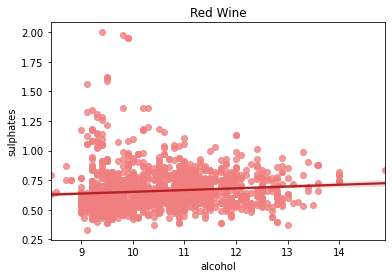

In [279]:
g = sns.regplot(data=data_r, x="alcohol", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Alcohol]

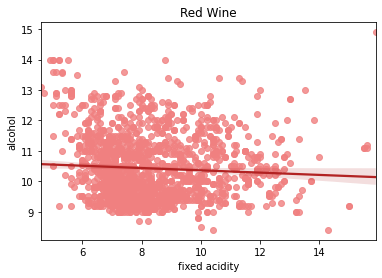

In [280]:
g = sns.regplot(data=data_r, x="fixed acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

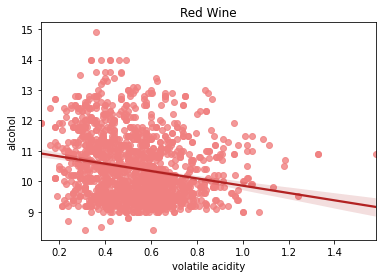

In [281]:
g = sns.regplot(data=data_r, x="volatile acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

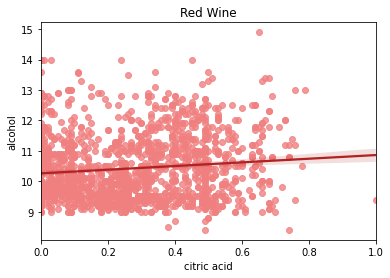

In [282]:
g = sns.regplot(data=data_r, x="citric acid", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

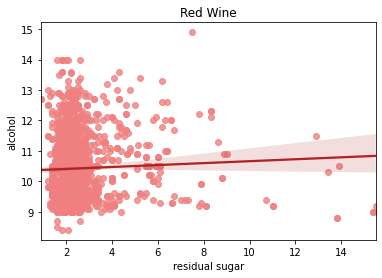

In [283]:
g = sns.regplot(data=data_r, x="residual sugar", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

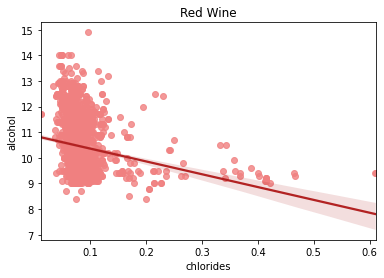

In [284]:
g = sns.regplot(data=data_r, x="chlorides", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

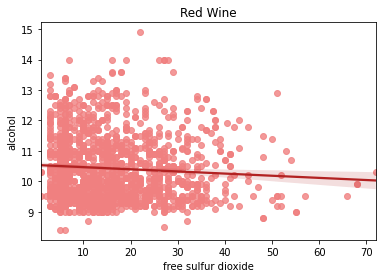

In [285]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

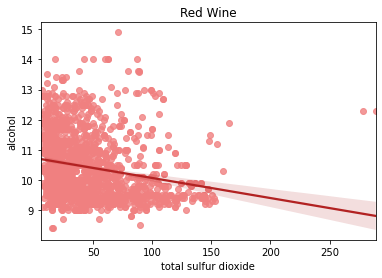

In [286]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

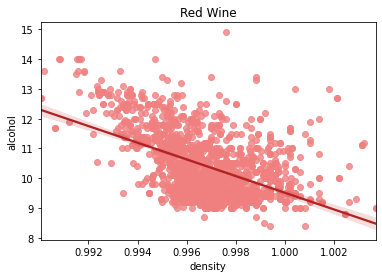

In [287]:
g = sns.regplot(data=data_r, x="density", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

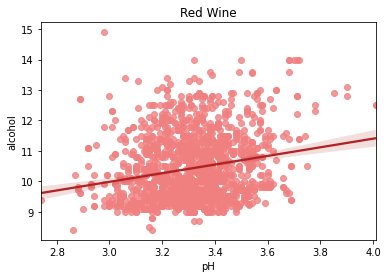

In [288]:
g = sns.regplot(data=data_r, x="pH", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

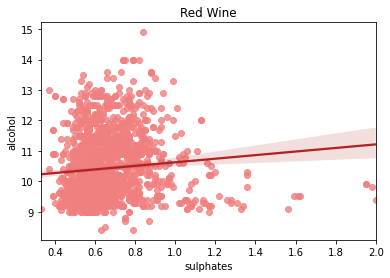

In [289]:
g = sns.regplot(data=data_r, x="sulphates", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

#### Categorical Scatterplots for Quality

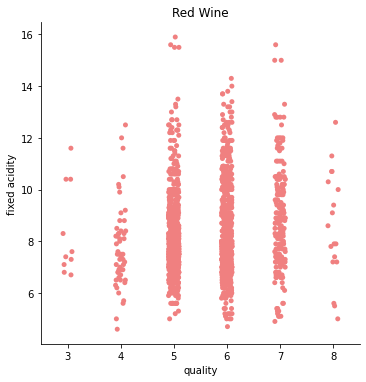

In [290]:
g = sns.catplot(data=data_r, x="quality", y="fixed acidity", color="lightcoral").set(title = "Red Wine")

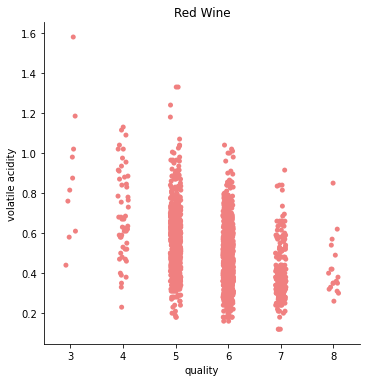

In [291]:
g = sns.catplot(data=data_r, x="quality", y="volatile acidity", color="lightcoral").set(title = "Red Wine")

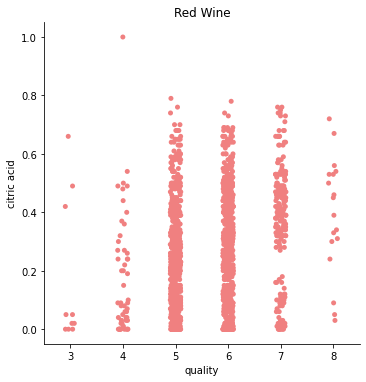

In [292]:
g = sns.catplot(data=data_r, x="quality", y="citric acid", color="lightcoral").set(title = "Red Wine")

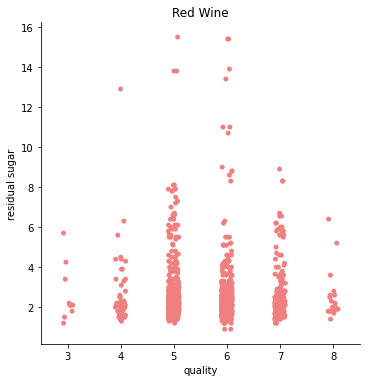

In [293]:
g = sns.catplot(data=data_r, x="quality", y="residual sugar", color="lightcoral").set(title = "Red Wine")

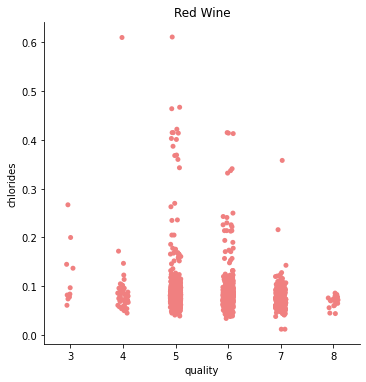

In [294]:
g = sns.catplot(data=data_r, x="quality", y="chlorides", color="lightcoral").set(title = "Red Wine")

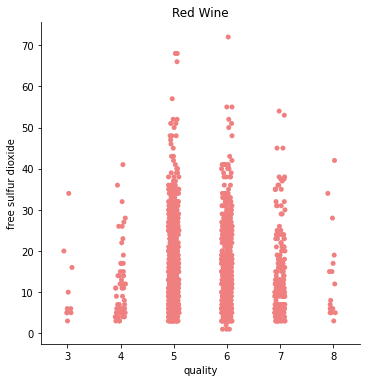

In [295]:
g = sns.catplot(data=data_r, x="quality", y="free sulfur dioxide", color="lightcoral").set(title = "Red Wine")

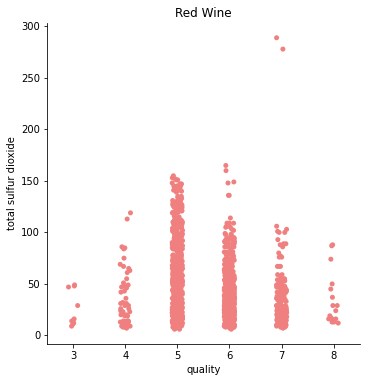

In [296]:
g = sns.catplot(data=data_r, x="quality", y="total sulfur dioxide", color="lightcoral").set(title = "Red Wine")

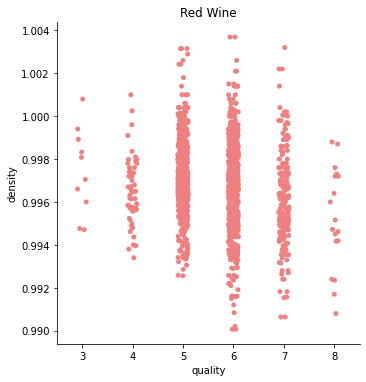

In [297]:
g = sns.catplot(data=data_r, x="quality", y="density", color="lightcoral").set(title = "Red Wine")

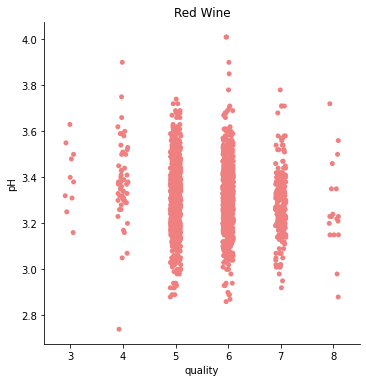

In [298]:
g = sns.catplot(data=data_r, x="quality", y="pH", color="lightcoral").set(title = "Red Wine")

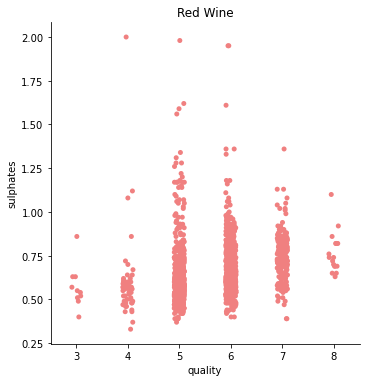

In [299]:
g = sns.catplot(data=data_r, x="quality", y="sulphates", color="lightcoral").set(title = "Red Wine")

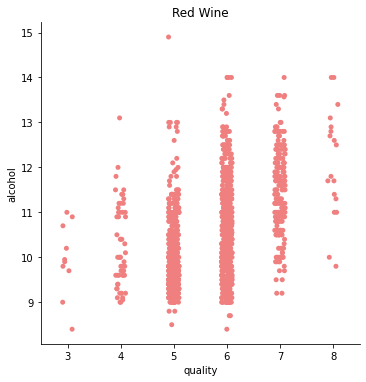

In [300]:
g = sns.catplot(data=data_r, x="quality", y="alcohol", color="lightcoral").set(title = "Red Wine")

#### Correlation Matrix

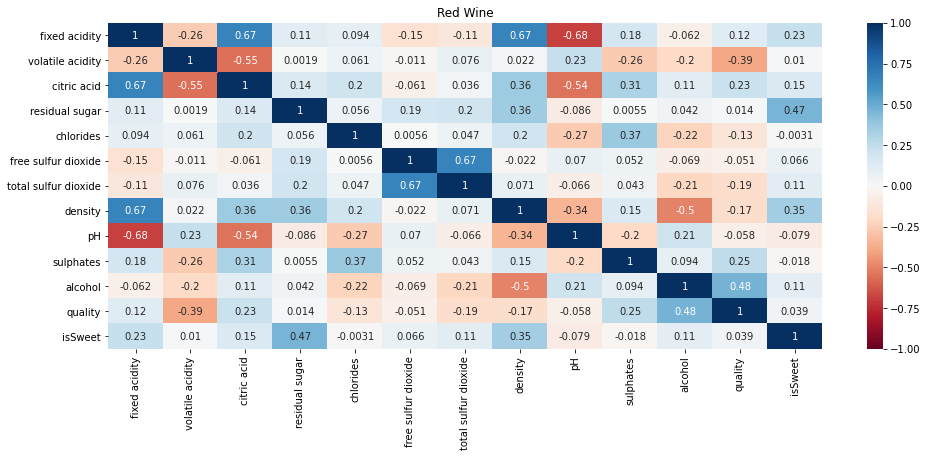

In [301]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_r.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu').set(title = "Red Wine")

Alcohol content, volatile acidity and sulphates have the strongest correlation with quality.

## Modelling

### White Wine

#### One-Hot Encoding

In [302]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  quality  alcohol_cat  isSweet
0            7.0              0.27         0.36  ...        6            L        1
1            6.3              0.30         0.34  ...        6            M        0
2            8.1              0.28         0.40  ...        6            M        1
3            7.2              0.23         0.32  ...        6            M        1
4            7.2              0.23         0.32  ...        6            M        1

[5 rows x 14 columns]

In [303]:
dummies = []
dummies.append(pd.get_dummies(data_w["alcohol_cat"]))
df_dummies = pd.concat(dummies, axis=1)
data_w = pd.concat((data_w, df_dummies), axis=1)
data_w = data_w.drop(["alcohol_cat"], axis=1)

In [304]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

#### Classification Modelling

##### Pre-Processing

In [305]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Converting Quality into a binary variable

In [306]:
data_bin_w = data_w.rename(columns={"quality":"quality_cat"})
for index, series in data_bin_w.iterrows():
    quality = series["quality_cat"]
    if quality < 6:
        data_bin_w.loc[index, "quality_cat"] = 0
    else:
        data_bin_w.loc[index, "quality_cat"] = 1

In [307]:
data_bin_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Quality is unbalanced

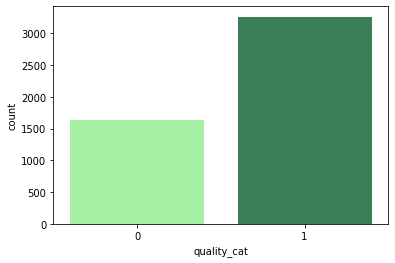

In [308]:
g = sns.countplot(x="quality_cat", data=data_bin_w, palette={0:"palegreen",1:"seagreen"})

In [309]:
X = data_bin_w.drop(["quality_cat"], axis=1).values
Q = data_bin_w["quality_cat"].values

Split 20% for test set and apply SMOTE to balance training set

In [310]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

XTrain, QTrain = SMOTE().fit_resample(XTrain, QTrain)
print(Counter(QTrain))

Counter({1: 2589, 0: 2589})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scale data

In [311]:
scaler = StandardScaler()
XTrain, XTest = (scaler.fit_transform(d) for d in (XTrain, XTest))

##### Logistic Regression

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2589
           1       0.77      0.70      0.73      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.74      5178
weighted avg       0.74      0.74      0.74      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.51      0.82      0.63       311
           1       0.88      0.63      0.73       669

    accuracy                           0.69       980
   macro avg       0.69      0.72      0.68       980
weighted avg       0.76      0.69      0.70       980

Cross-validation scores
Training set: 0.74 (± 0.02)
Test set: 0.75 (± 0.02)


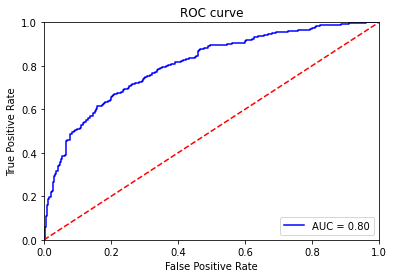

In [312]:
clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='auto')
clf.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

Hyper-Parameter Tuning

In [313]:
tuned_parameters = [{'C': [1, 10, 100]}]

clf = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.740 (± 0.038) for {'C': 1}

0.741 (± 0.037) for {'C': 10}

0.741 (± 0.037) for {'C': 100}



##### SVC

###### Linear

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2589
           1       0.77      0.67      0.72      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.74      5178
weighted avg       0.74      0.74      0.74      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.49      0.84      0.62       311
           1       0.89      0.60      0.72       669

    accuracy                           0.68       980
   macro avg       0.69      0.72      0.67       980
weighted avg       0.76      0.68      0.69       980

Cross-validation scores
Training set: 0.73 (± 0.01)
Test set: 0.74 (± 0.03)


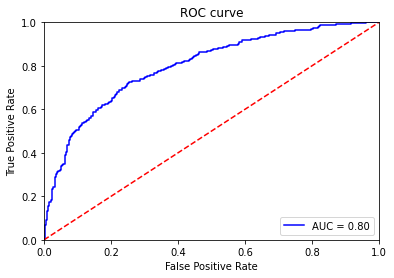

In [314]:
svm = SVC(kernel='linear')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Poly

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2589
           1       0.82      0.76      0.79      2589

    accuracy                           0.80      5178
   macro avg       0.80      0.80      0.80      5178
weighted avg       0.80      0.80      0.80      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.52      0.78      0.63       311
           1       0.87      0.67      0.75       669

    accuracy                           0.70       980
   macro avg       0.70      0.73      0.69       980
weighted avg       0.76      0.70      0.71       980

Cross-validation scores
Training set: 0.76 (± 0.04)
Test set: 0.74 (± 0.01)


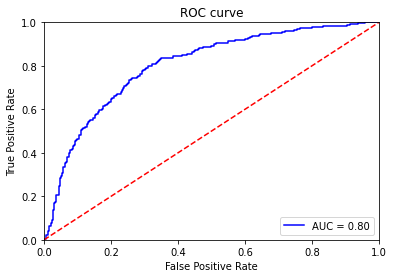

In [315]:
svm = SVC(kernel='poly')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### RBF

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2589
           1       0.84      0.80      0.82      2589

    accuracy                           0.82      5178
   macro avg       0.83      0.82      0.82      5178
weighted avg       0.83      0.82      0.82      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       311
           1       0.87      0.72      0.79       669

    accuracy                           0.74       980
   macro avg       0.72      0.75      0.72       980
weighted avg       0.78      0.74      0.75       980

Cross-validation scores
Training set: 0.78 (± 0.04)
Test set: 0.75 (± 0.03)


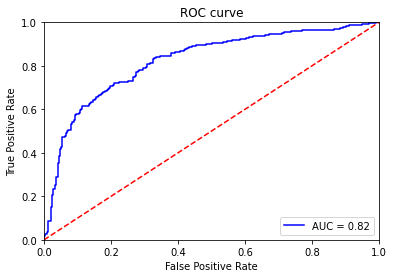

In [316]:
svm = SVC(kernel='rbf')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Hyper-Parameter Tuning

In [317]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.791 (± 0.055) for {'C': 1, 'kernel': 'rbf'}

0.812 (± 0.066) for {'C': 10, 'kernel': 'rbf'}

0.825 (± 0.085) for {'C': 100, 'kernel': 'rbf'}

0.778 (± 0.054) for {'C': 1, 'kernel': 'poly'}

0.795 (± 0.061) for {'C': 10, 'kernel': 'poly'}

0.797 (± 0.075) for {'C': 100, 'kernel': 'poly'}

0.734 (± 0.028) for {'C': 1, 'kernel': 'linear'}

0.735 (± 0.029) for {'C': 10, 'kernel': 'linear'}

0.734 (± 0.029) for {'C': 100, 'kernel': 'linear'}



##### Decision Tree

Train Set Predictions Report

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2589
           1       0.92      0.87      0.89      2589

    accuracy                           0.90      5178
   macro avg       0.90      0.90      0.90      5178
weighted avg       0.90      0.90      0.90      5178

Test Set Predictions Report

              precision    recall  f1-score   support

           0       0.38      0.81      0.52       311
           1       0.82      0.38      0.52       669

    accuracy                           0.52       980
   macro avg       0.60      0.60      0.52       980
weighted avg       0.68      0.52      0.52       980

Cross-validation scores
Training set: 0.78 (± 0.04)
Test set: 0.69 (± 0.05)


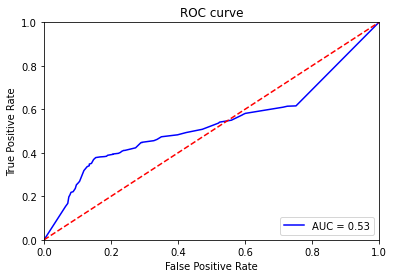

In [318]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

##### Random Forest

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2589
           1       1.00      1.00      1.00      2589

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.34      0.98      0.51       311
           1       0.94      0.11      0.20       669

    accuracy                           0.39       980
   macro avg       0.64      0.55      0.35       980
weighted avg       0.75      0.39      0.30       980

Cross-validation scores
Training set: 0.85 (± 0.06)
Test set: 0.77 (± 0.02)


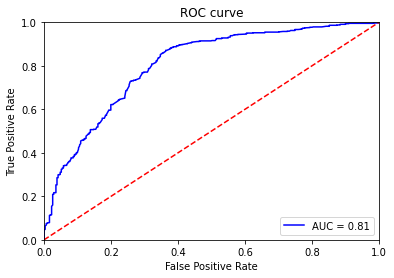

In [319]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=10)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [320]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 100}

Grid scores on development set:

0.769 (± 0.050) for {'max_depth': 5, 'n_estimators': 10}

0.780 (± 0.058) for {'max_depth': 5, 'n_estimators': 50}

0.788 (± 0.058) for {'max_depth': 5, 'n_estimators': 100}

0.789 (± 0.058) for {'max_depth': 5, 'n_estimators': 200}

0.813 (± 0.066) for {'max_depth': 10, 'n_estimators': 10}

0.832 (± 0.067) for {'max_depth': 10, 'n_estimators': 50}

0.830 (± 0.066) for {'max_depth': 10, 'n_estimators': 100}

0.833 (± 0.060) for {'max_depth': 10, 'n_estimators': 200}

0.846 (± 0.057) for {'max_depth': 20, 'n_estimators': 10}

0.860 (± 0.074) for {'max_depth': 20, 'n_estimators': 50}

0.863 (± 0.077) for {'max_depth': 20, 'n_estimators': 100}

0.860 (± 0.076) for {'max_depth': 20, 'n_estimators': 200}

0.838 (± 0.072) for {'max_depth': 50, 'n_estimators': 10}

0.856 (± 0.075) for {'max_depth': 50, 'n_estimators': 50}

0.862 (± 0.080) for {'max_depth': 50, 'n_estimators'

##### KNN

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2589
           1       0.90      0.84      0.87      2589

    accuracy                           0.87      5178
   macro avg       0.88      0.87      0.87      5178
weighted avg       0.88      0.87      0.87      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       311
           1       0.86      0.73      0.79       669

    accuracy                           0.74       980
   macro avg       0.71      0.74      0.72       980
weighted avg       0.77      0.74      0.74       980

Cross-validation scores
Training set: 0.78 (± 0.04)
Test set: 0.75 (± 0.02)


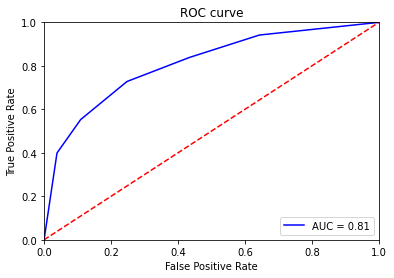

In [321]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [322]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.793 (± 0.035) for {'n_neighbors': 5}

0.772 (± 0.039) for {'n_neighbors': 10}

0.769 (± 0.037) for {'n_neighbors': 25}

0.762 (± 0.031) for {'n_neighbors': 50}



#### Regression Modelling

##### Pre-Processing

In [323]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

In [324]:
X = data_w.drop(["quality"], axis=1).values
Q = data_w["quality"].values

Split 20% for test set

In [325]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

##### Linear Regression

In [326]:
reg = LinearRegression()
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.27 (± 0.04)
Test set: 0.27 (± 0.03)

MSE:  0.5482307327826745
RMSE:  0.7404260481524637


##### SVR

###### Linear

In [327]:
reg = SVR(kernel='linear')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.26 (± 0.03)
Test set: 0.25 (± 0.04)

MSE:  0.5567608775364067
RMSE:  0.7461641089843485


###### Poly

In [328]:
reg = SVR(kernel='poly')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.08 (± 0.02)
Test set: 0.07 (± 0.02)

MSE:  0.6713623806993232
RMSE:  0.8193670610290136


###### RBF

In [329]:
reg = SVR(kernel='rbf')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.13 (± 0.02)
Test set: 0.09 (± 0.01)

MSE:  0.6521622111702988
RMSE:  0.8075656079664976


##### Decision Tree

In [330]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.17 (± 0.03)
Test set: -0.15 (± 0.22)

MSE:  0.5801209500083471
RMSE:  0.76165671401777


##### Random Forest

In [331]:
reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.48 (± 0.06)
Test set: 0.31 (± 0.07)

MSE:  0.34030059770489607
RMSE:  0.583352892942939


##### KNN

In [332]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.13 (± 0.04)
Test set: 0.00 (± 0.08)

MSE:  0.6453061224489797
RMSE:  0.8033094811148314


### Red Wine

#### One-Hot Encoding

In [333]:
data_r.head()

fixed acidity  volatile acidity  citric acid  ...  quality  alcohol_cat  isSweet
0            7.4              0.70         0.00  ...        5            M        0
1            7.8              0.88         0.00  ...        5            M        1
2            7.8              0.76         0.04  ...        5            M        1
3           11.2              0.28         0.56  ...        6            M        0
4            7.4              0.70         0.00  ...        5            M        0

[5 rows x 14 columns]

In [334]:
dummies = []
dummies.append(pd.get_dummies(data_r["alcohol_cat"]))
df_dummies = pd.concat(dummies, axis=1)
data_r = pd.concat((data_r, df_dummies), axis=1)
data_r = data_r.drop(["alcohol_cat"], axis=1)

In [335]:
data_r.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.4              0.70         0.00  ...  0  0  1
1            7.8              0.88         0.00  ...  0  0  1
2            7.8              0.76         0.04  ...  0  0  1
3           11.2              0.28         0.56  ...  0  0  1
4            7.4              0.70         0.00  ...  0  0  1

[5 rows x 16 columns]

#### Classification Modelling

##### Pre-Processing

In [336]:
data_r.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.4              0.70         0.00  ...  0  0  1
1            7.8              0.88         0.00  ...  0  0  1
2            7.8              0.76         0.04  ...  0  0  1
3           11.2              0.28         0.56  ...  0  0  1
4            7.4              0.70         0.00  ...  0  0  1

[5 rows x 16 columns]

Converting Quality into a binary variable

In [337]:
data_bin_r = data_r.rename(columns={"quality":"quality_cat"})
for index, series in data_bin_r.iterrows():
    quality = series["quality_cat"]
    if quality < 6:
        data_bin_r.loc[index, "quality_cat"] = 0
    else:
        data_bin_r.loc[index, "quality_cat"] = 1

In [338]:
data_bin_r.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.4              0.70         0.00  ...  0  0  1
1            7.8              0.88         0.00  ...  0  0  1
2            7.8              0.76         0.04  ...  0  0  1
3           11.2              0.28         0.56  ...  0  0  1
4            7.4              0.70         0.00  ...  0  0  1

[5 rows x 16 columns]

Quality is unbalanced

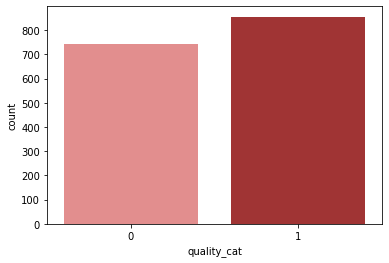

In [339]:
g = sns.countplot(x="quality_cat", data=data_bin_r, palette={0:"lightcoral",1:"firebrick"})

In [340]:
X = data_bin_r.drop(["quality_cat"], axis=1).values
Q = data_bin_r["quality_cat"].values

Split 20% for test set and apply SMOTE to balance training set

In [341]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

XTrain, QTrain = SMOTE().fit_resample(XTrain, QTrain)
print(Counter(QTrain))

Counter({1: 678, 0: 678})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scale data

In [342]:
scaler = StandardScaler()
XTrain, XTest = (scaler.fit_transform(d) for d in (XTrain, XTest))

##### Logistic Regression

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       678
           1       0.77      0.72      0.74       678

    accuracy                           0.75      1356
   macro avg       0.75      0.75      0.75      1356
weighted avg       0.75      0.75      0.75      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       143
           1       0.80      0.67      0.73       177

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320

Cross-validation scores
Training set: 0.75 (± 0.02)
Test set: 0.74 (± 0.00)


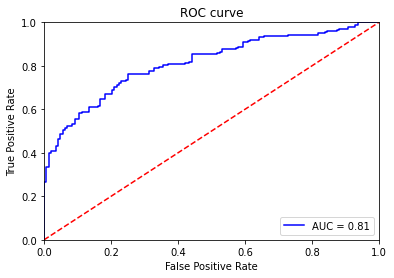

In [343]:
clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='auto')
clf.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

Hyper-Parameter Tuning

In [344]:
tuned_parameters = [{'C': [1, 10, 100]}]

clf = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 1}

Grid scores on development set:

0.755 (± 0.063) for {'C': 1}

0.754 (± 0.066) for {'C': 10}

0.754 (± 0.066) for {'C': 100}



##### SVC

###### Linear

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       678
           1       0.77      0.71      0.74       678

    accuracy                           0.75      1356
   macro avg       0.75      0.75      0.75      1356
weighted avg       0.75      0.75      0.75      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       143
           1       0.83      0.69      0.75       177

    accuracy                           0.75       320
   macro avg       0.76      0.76      0.75       320
weighted avg       0.76      0.75      0.75       320

Cross-validation scores
Training set: 0.74 (± 0.02)
Test set: 0.75 (± 0.03)


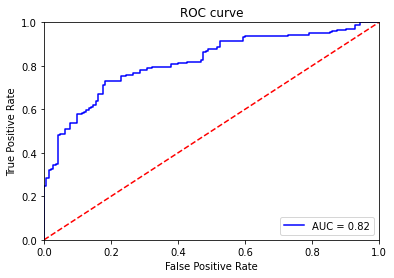

In [345]:
svm = SVC(kernel='linear')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Poly

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       678
           1       0.86      0.69      0.77       678

    accuracy                           0.79      1356
   macro avg       0.80      0.79      0.79      1356
weighted avg       0.80      0.79      0.79      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       143
           1       0.84      0.65      0.73       177

    accuracy                           0.74       320
   macro avg       0.75      0.75      0.74       320
weighted avg       0.76      0.74      0.74       320

Cross-validation scores
Training set: 0.74 (± 0.05)
Test set: 0.68 (± 0.02)


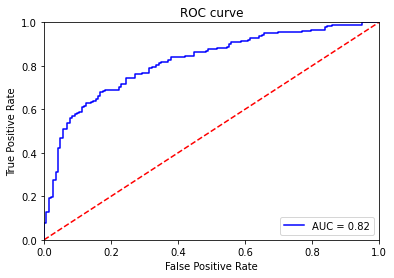

In [346]:
svm = SVC(kernel='poly')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### RBF

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       678
           1       0.81      0.78      0.80       678

    accuracy                           0.80      1356
   macro avg       0.80      0.80      0.80      1356
weighted avg       0.80      0.80      0.80      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       143
           1       0.80      0.73      0.76       177

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Cross-validation scores
Training set: 0.77 (± 0.02)
Test set: 0.73 (± 0.03)


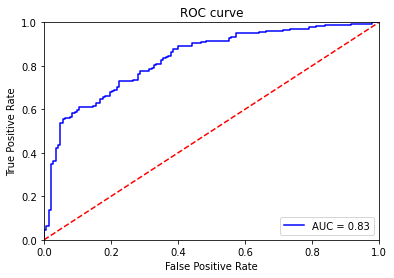

In [347]:
svm = SVC(kernel='rbf')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Hyper-Parameter Tuning

In [348]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 1, 'kernel': 'rbf'}

Grid scores on development set:

0.768 (± 0.034) for {'C': 1, 'kernel': 'rbf'}

0.763 (± 0.041) for {'C': 10, 'kernel': 'rbf'}

0.766 (± 0.024) for {'C': 100, 'kernel': 'rbf'}

0.745 (± 0.042) for {'C': 1, 'kernel': 'poly'}

0.759 (± 0.023) for {'C': 10, 'kernel': 'poly'}

0.754 (± 0.045) for {'C': 100, 'kernel': 'poly'}

0.743 (± 0.054) for {'C': 1, 'kernel': 'linear'}

0.741 (± 0.056) for {'C': 10, 'kernel': 'linear'}

0.741 (± 0.056) for {'C': 100, 'kernel': 'linear'}



##### Decision Tree

Train Set Predictions Report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       678
           1       0.97      0.95      0.96       678

    accuracy                           0.96      1356
   macro avg       0.96      0.96      0.96      1356
weighted avg       0.96      0.96      0.96      1356

Test Set Predictions Report

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       143
           1       0.70      0.63      0.67       177

    accuracy                           0.65       320
   macro avg       0.65      0.65      0.65       320
weighted avg       0.66      0.65      0.65       320

Cross-validation scores
Training set: 0.75 (± 0.01)
Test set: 0.68 (± 0.03)


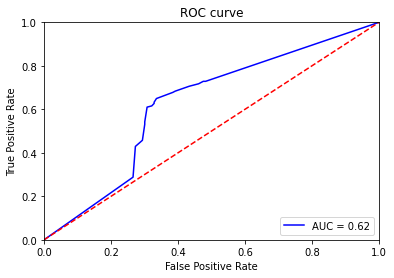

In [349]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

##### Random Forest

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1356
   macro avg       1.00      1.00      1.00      1356
weighted avg       1.00      1.00      1.00      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       143
           1       0.85      0.72      0.78       177

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.77       320
weighted avg       0.79      0.78      0.78       320

Cross-validation scores
Training set: 0.80 (± 0.02)
Test set: 0.70 (± 0.03)


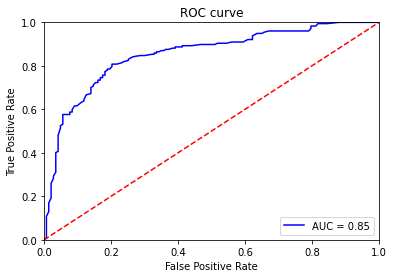

In [350]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=10)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [351]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'max_depth': 50, 'n_estimators': 100}

Grid scores on development set:

0.757 (± 0.035) for {'max_depth': 5, 'n_estimators': 10}

0.769 (± 0.037) for {'max_depth': 5, 'n_estimators': 50}

0.773 (± 0.038) for {'max_depth': 5, 'n_estimators': 100}

0.775 (± 0.035) for {'max_depth': 5, 'n_estimators': 200}

0.802 (± 0.058) for {'max_depth': 10, 'n_estimators': 10}

0.804 (± 0.029) for {'max_depth': 10, 'n_estimators': 50}

0.813 (± 0.037) for {'max_depth': 10, 'n_estimators': 100}

0.813 (± 0.016) for {'max_depth': 10, 'n_estimators': 200}

0.795 (± 0.028) for {'max_depth': 20, 'n_estimators': 10}

0.807 (± 0.025) for {'max_depth': 20, 'n_estimators': 50}

0.816 (± 0.025) for {'max_depth': 20, 'n_estimators': 100}

0.811 (± 0.017) for {'max_depth': 20, 'n_estimators': 200}

0.794 (± 0.038) for {'max_depth': 50, 'n_estimators': 10}

0.810 (± 0.039) for {'max_depth': 50, 'n_estimators': 50}

0.818 (± 0.022) for {'max_depth': 50, 'n_estimators'

##### KNN

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       678
           1       0.82      0.85      0.83       678

    accuracy                           0.83      1356
   macro avg       0.83      0.83      0.83      1356
weighted avg       0.83      0.83      0.83      1356

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       143
           1       0.70      0.75      0.73       177

    accuracy                           0.69       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.69      0.69      0.69       320

Cross-validation scores
Training set: 0.72 (± 0.01)
Test set: 0.70 (± 0.08)


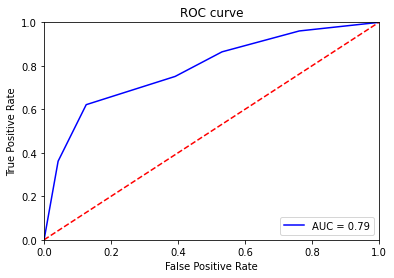

In [352]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [353]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'n_neighbors': 25}

Grid scores on development set:

0.721 (± 0.048) for {'n_neighbors': 5}

0.726 (± 0.039) for {'n_neighbors': 10}

0.739 (± 0.071) for {'n_neighbors': 25}

0.724 (± 0.038) for {'n_neighbors': 50}



#### Regression Modelling

##### Pre-Processing

In [354]:
data_r.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.4              0.70         0.00  ...  0  0  1
1            7.8              0.88         0.00  ...  0  0  1
2            7.8              0.76         0.04  ...  0  0  1
3           11.2              0.28         0.56  ...  0  0  1
4            7.4              0.70         0.00  ...  0  0  1

[5 rows x 16 columns]

In [355]:
X = data_r.drop(["quality"], axis=1).values
Q = data_r["quality"].values

Split 20% for test set

In [356]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

##### Linear Regression

In [357]:
reg = LinearRegression()
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.33 (± 0.04)
Test set: 0.39 (± 0.08)

MSE:  0.44264969624078654
RMSE:  0.6653192438527437


##### SVR

###### Linear

In [358]:
reg = SVR(kernel='linear')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.32 (± 0.01)
Test set: 0.40 (± 0.11)

MSE:  0.4499316610419887
RMSE:  0.6707694544640421


###### Poly

In [359]:
reg = SVR(kernel='poly')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.06 (± 0.03)
Test set: 0.05 (± 0.05)

MSE:  0.6649247615679856
RMSE:  0.8154291885675823


###### RBF

In [360]:
reg = SVR(kernel='rbf')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.13 (± 0.05)
Test set: 0.05 (± 0.10)

MSE:  0.6107097575300251
RMSE:  0.781479211195042


##### Decision Tree

In [361]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.08 (± 0.09)
Test set: -0.23 (± 0.28)

MSE:  0.657816161404756
RMSE:  0.811058667054829


##### Random Forest

In [362]:
reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.41 (± 0.05)
Test set: 0.34 (± 0.03)

MSE:  0.3788581305309728
RMSE:  0.6155145250365525


##### KNN

In [363]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores
Training set: 0.09 (± 0.09)
Test set: -0.00 (± 0.18)

MSE:  0.5522499999999999
RMSE:  0.743135250139569
